In [1]:
import numpy as np
import torch
import os
import sys
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)
from model import AttentionModel
from model_PCA_correlation import AttentionModel_PCA
from dcascore import *
from utils import read_fasta_alignment, remove_duplicate_sequences, add_PCA_coords

# back to original path (in PLM)
sys.path.pop(0)  # Removes the parent_dir from sys.path
from model import AttentionModel

from plm_gen_methods import generate_plm_n_save, generate_coords_n_save
from seq_utils import read_tensor_from_txt, set_seed, letters_to_nums, modify_seq 


In [19]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
font = {'size'   : 18}

matplotlib.rc('font', **font)

## Model 1

In [2]:
"""
    Load Q, K, V matrices from jdoms (after training)
"""
set_seed()
H = 64
d= 10
N = 174
n_epochs = 500
nb_PCA_comp=2
loss_type = 'without_J'
family = 'jdoms' #'jdoms_bacteria_train2'
cwd = parent_dir
Q_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_brute_force_35_bins/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
K_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_brute_force_35_bins/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_brute_force_35_bins/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
H,d,N=Q_1.shape
q=V_1.shape[1]


In [3]:
model=AttentionModel(H,d,N,q,Q=Q_1,V=V_1,K=K_1)
torch.sum(model.Q-Q_1)
device = Q_1.device
L = Q_1.shape[-1]
W=attention_heads_from_model(model,Q_1,K_1,V_1)
print(W.shape)

i_indices = torch.arange(L, device=device).unsqueeze(1)
j_indices = torch.arange(L, device=device).unsqueeze(0)
mask = (i_indices != j_indices).float().unsqueeze(0)  # shape (1, L, L)
W = W * mask
    
# Compute Jtens
Jtens = torch.einsum('hri,hab->abri', W, V_1)  # Shape: (q, q, L, L)
q = Jtens.shape[0]
N = Jtens.shape[2]
print(q)
print(N)

torch.Size([64, 65, 65])
35
65


In [6]:
import platform

if platform.system() == "Darwin":  # macOS
    base_path = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/CODE/DataAttentionDCA/jdoms'
else:  # assume Windows for Youss
    base_path = r"C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\DataAttentionDCA\jdoms"

file_test_data = f"{base_path}/jdoms_bacteria_train2.fasta"
seq_data_test=read_fasta_alignment(file_test_data,0.8)

print(seq_data_test.shape)
seq_data_test_filtered,_=remove_duplicate_sequences(seq_data_test)
seq_data_test_filtered=seq_data_test_filtered.T
seq_data_test_filtered_with_PCA= add_PCA_coords(seq_data_test_filtered,35) #####DONT FORGET TO CHANGE NUMBER OF BINS IF NECESSARY


#init_sequence = 'DYYQVLGVPKDADAKSIKKAFRKLARKYHPDVNPGDKEAERKFKEANEANEVLSDPEKRKKYD'
init_sequence_num = seq_data_test_filtered_with_PCA[12919]
print(init_sequence_num[-2:])
print("initial sequence number:", init_sequence_num)
ratio = 0.
init_sequence_num = modify_seq(init_sequence_num, ratio,nb_PCA_comp=2)
N_iter=1000

save_dir = "generated_coords_Model1_PCA"
save_name = f"gen_coords_Ns{N_iter}_r{ratio}"
#target_coords = np.array([20, 20])  # Example target coordinates for PCA components
generate_coords_n_save(save_dir=save_dir, save_name=save_name, J=Jtens, N_iter = N_iter, init_sequence=init_sequence_num,nb_PCA_comp=nb_PCA_comp, J_PCA=None, beta_PCA=1, model=1)
print("done generating coords with PLM from a fixed sequence sequence")

Total sequences read: 14502
Sequences after filtering: 14502
(63, 14502)
Removing duplicate sequences...
Done: 14502 -> 14502 sequences after removing duplicates.
[26 21]
initial sequence number: [20 20  4  3  9  4  5 17  3 14 14 13  2 14  0 13  9  2  0 14 18  8  3  9
 13 14 13  0  6 12  2 14  4  0 15  3  5  0  0  0 13 18 15 17 14  7 11  3
  0 19 13 14  9  8  3 12  9 16 14  0  0 19 20 26 21]


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration 1/1000


  0%|          | 1/1000 [00:02<38:33,  2.32s/it]

Generated PCA coordinate: [ 8 28]
Iteration 2/1000


  0%|          | 2/1000 [00:04<38:38,  2.32s/it]

Generated PCA coordinate: [ 8 12]
Iteration 3/1000


  0%|          | 3/1000 [00:06<38:43,  2.33s/it]

Generated PCA coordinate: [ 8 22]
Iteration 4/1000


  0%|          | 4/1000 [00:09<39:49,  2.40s/it]

Generated PCA coordinate: [31 22]
Iteration 5/1000


  0%|          | 5/1000 [00:12<41:14,  2.49s/it]

Generated PCA coordinate: [ 8 18]
Iteration 6/1000


  1%|          | 6/1000 [00:14<43:02,  2.60s/it]

Generated PCA coordinate: [ 8 11]
Iteration 7/1000


  1%|          | 7/1000 [00:17<44:49,  2.71s/it]

Generated PCA coordinate: [21 12]
Iteration 8/1000


  1%|          | 8/1000 [00:20<45:42,  2.77s/it]

Generated PCA coordinate: [8 5]
Iteration 9/1000


  1%|          | 9/1000 [00:23<46:23,  2.81s/it]

Generated PCA coordinate: [ 9 25]
Iteration 10/1000


  1%|          | 10/1000 [00:26<45:12,  2.74s/it]

Generated PCA coordinate: [ 3 18]
Iteration 11/1000


  1%|          | 11/1000 [00:28<42:45,  2.59s/it]

Generated PCA coordinate: [18 14]
Iteration 12/1000


  1%|          | 12/1000 [00:31<43:25,  2.64s/it]

Generated PCA coordinate: [0 8]
Iteration 13/1000


  1%|▏         | 13/1000 [00:33<43:11,  2.63s/it]

Generated PCA coordinate: [14 14]
Iteration 14/1000


  1%|▏         | 14/1000 [00:36<42:01,  2.56s/it]

Generated PCA coordinate: [ 8 14]
Iteration 15/1000


  2%|▏         | 15/1000 [00:38<42:33,  2.59s/it]

Generated PCA coordinate: [29 21]
Iteration 16/1000


  2%|▏         | 16/1000 [00:41<40:31,  2.47s/it]

Generated PCA coordinate: [30 29]
Iteration 17/1000


  2%|▏         | 17/1000 [00:43<40:13,  2.46s/it]

Generated PCA coordinate: [34 27]
Iteration 18/1000


  2%|▏         | 18/1000 [00:45<40:11,  2.46s/it]

Generated PCA coordinate: [31  9]
Iteration 19/1000


  2%|▏         | 19/1000 [00:48<40:49,  2.50s/it]

Generated PCA coordinate: [22  8]
Iteration 20/1000


  2%|▏         | 20/1000 [00:51<42:25,  2.60s/it]

Generated PCA coordinate: [14 11]
Iteration 21/1000


  2%|▏         | 21/1000 [00:54<42:28,  2.60s/it]

Generated PCA coordinate: [ 8 14]
Iteration 22/1000


  2%|▏         | 22/1000 [00:56<42:09,  2.59s/it]

Generated PCA coordinate: [ 7 30]
Iteration 23/1000


  2%|▏         | 23/1000 [00:59<43:51,  2.69s/it]

Generated PCA coordinate: [14  2]
Iteration 24/1000


  2%|▏         | 24/1000 [01:02<44:23,  2.73s/it]

Generated PCA coordinate: [ 4 29]
Iteration 25/1000


  2%|▎         | 25/1000 [01:06<49:43,  3.06s/it]

Generated PCA coordinate: [33 14]
Iteration 26/1000


  3%|▎         | 26/1000 [01:10<54:43,  3.37s/it]

Generated PCA coordinate: [31 10]
Iteration 27/1000


  3%|▎         | 27/1000 [01:13<55:59,  3.45s/it]

Generated PCA coordinate: [22 10]
Iteration 28/1000


  3%|▎         | 28/1000 [01:17<54:29,  3.36s/it]

Generated PCA coordinate: [ 9 11]
Iteration 29/1000


  3%|▎         | 29/1000 [01:20<53:25,  3.30s/it]

Generated PCA coordinate: [ 9 13]
Iteration 30/1000


  3%|▎         | 30/1000 [01:22<50:14,  3.11s/it]

Generated PCA coordinate: [7 9]
Iteration 31/1000


  3%|▎         | 31/1000 [01:25<48:27,  3.00s/it]

Generated PCA coordinate: [14 10]
Iteration 32/1000


  3%|▎         | 32/1000 [01:28<46:31,  2.88s/it]

Generated PCA coordinate: [ 7 14]
Iteration 33/1000


  3%|▎         | 33/1000 [01:31<48:31,  3.01s/it]

Generated PCA coordinate: [9 9]
Iteration 34/1000


  3%|▎         | 34/1000 [01:34<46:11,  2.87s/it]

Generated PCA coordinate: [ 9 27]
Iteration 35/1000


  4%|▎         | 35/1000 [01:36<43:22,  2.70s/it]

Generated PCA coordinate: [8 0]
Iteration 36/1000


  4%|▎         | 36/1000 [01:39<43:11,  2.69s/it]

Generated PCA coordinate: [22 14]
Iteration 37/1000


  4%|▎         | 37/1000 [01:41<41:32,  2.59s/it]

Generated PCA coordinate: [ 8 14]
Iteration 38/1000


  4%|▍         | 38/1000 [01:44<42:23,  2.64s/it]

Generated PCA coordinate: [ 0 11]
Iteration 39/1000


  4%|▍         | 39/1000 [01:46<43:04,  2.69s/it]

Generated PCA coordinate: [27 14]
Iteration 40/1000


  4%|▍         | 40/1000 [01:49<42:26,  2.65s/it]

Generated PCA coordinate: [14 14]
Iteration 41/1000


  4%|▍         | 41/1000 [01:52<43:02,  2.69s/it]

Generated PCA coordinate: [14 16]
Iteration 42/1000


  4%|▍         | 42/1000 [01:55<43:15,  2.71s/it]

Generated PCA coordinate: [29 21]
Iteration 43/1000


  4%|▍         | 43/1000 [01:57<42:57,  2.69s/it]

Generated PCA coordinate: [ 7 29]
Iteration 44/1000


  4%|▍         | 44/1000 [02:00<44:11,  2.77s/it]

Generated PCA coordinate: [ 8 14]
Iteration 45/1000


  4%|▍         | 45/1000 [02:03<45:21,  2.85s/it]

Generated PCA coordinate: [8 9]
Iteration 46/1000


  5%|▍         | 46/1000 [02:06<46:55,  2.95s/it]

Generated PCA coordinate: [19 14]
Iteration 47/1000


  5%|▍         | 47/1000 [02:10<48:22,  3.05s/it]

Generated PCA coordinate: [19 29]
Iteration 48/1000


  5%|▍         | 48/1000 [02:13<48:24,  3.05s/it]

Generated PCA coordinate: [10  8]
Iteration 49/1000


  5%|▍         | 49/1000 [02:16<49:01,  3.09s/it]

Generated PCA coordinate: [ 9 14]
Iteration 50/1000


  5%|▌         | 50/1000 [02:19<49:05,  3.10s/it]

Generated PCA coordinate: [27 14]
Iteration 51/1000


  5%|▌         | 51/1000 [02:22<48:54,  3.09s/it]

Generated PCA coordinate: [18 11]
Iteration 52/1000


  5%|▌         | 52/1000 [02:25<49:46,  3.15s/it]

Generated PCA coordinate: [29 32]
Iteration 53/1000


  5%|▌         | 53/1000 [02:28<46:44,  2.96s/it]

Generated PCA coordinate: [8 9]
Iteration 54/1000


  5%|▌         | 54/1000 [02:31<46:25,  2.94s/it]

Generated PCA coordinate: [ 7 16]
Iteration 55/1000


  6%|▌         | 55/1000 [02:33<44:17,  2.81s/it]

Generated PCA coordinate: [ 7 14]
Iteration 56/1000


  6%|▌         | 56/1000 [02:36<42:26,  2.70s/it]

Generated PCA coordinate: [15 22]
Iteration 57/1000


  6%|▌         | 57/1000 [02:38<41:22,  2.63s/it]

Generated PCA coordinate: [ 9 33]
Iteration 58/1000


  6%|▌         | 58/1000 [02:41<40:33,  2.58s/it]

Generated PCA coordinate: [14 15]
Iteration 59/1000


  6%|▌         | 59/1000 [02:44<41:57,  2.68s/it]

Generated PCA coordinate: [ 0 27]
Iteration 60/1000


  6%|▌         | 60/1000 [02:46<42:48,  2.73s/it]

Generated PCA coordinate: [11  3]
Iteration 61/1000


  6%|▌         | 61/1000 [02:50<44:28,  2.84s/it]

Generated PCA coordinate: [9 3]
Iteration 62/1000


  6%|▌         | 62/1000 [02:53<46:06,  2.95s/it]

Generated PCA coordinate: [28 26]
Iteration 63/1000


  6%|▋         | 63/1000 [02:56<46:55,  3.01s/it]

Generated PCA coordinate: [ 8 14]
Iteration 64/1000


  6%|▋         | 64/1000 [03:00<49:53,  3.20s/it]

Generated PCA coordinate: [32 14]
Iteration 65/1000


  6%|▋         | 65/1000 [03:02<48:21,  3.10s/it]

Generated PCA coordinate: [18 30]
Iteration 66/1000


  7%|▋         | 66/1000 [03:05<45:41,  2.94s/it]

Generated PCA coordinate: [21 22]
Iteration 67/1000


  7%|▋         | 67/1000 [03:07<43:38,  2.81s/it]

Generated PCA coordinate: [17 25]
Iteration 68/1000


  7%|▋         | 68/1000 [03:10<42:55,  2.76s/it]

Generated PCA coordinate: [ 7 14]
Iteration 69/1000


  7%|▋         | 69/1000 [03:13<43:28,  2.80s/it]

Generated PCA coordinate: [ 8 14]
Iteration 70/1000


  7%|▋         | 70/1000 [03:16<42:37,  2.75s/it]

Generated PCA coordinate: [30 22]
Iteration 71/1000


  7%|▋         | 71/1000 [03:18<42:14,  2.73s/it]

Generated PCA coordinate: [27  7]
Iteration 72/1000


  7%|▋         | 72/1000 [03:22<47:58,  3.10s/it]

Generated PCA coordinate: [32 10]
Iteration 73/1000


  7%|▋         | 73/1000 [03:25<45:01,  2.91s/it]

Generated PCA coordinate: [ 8 26]
Iteration 74/1000


  7%|▋         | 74/1000 [03:28<44:12,  2.86s/it]

Generated PCA coordinate: [9 3]
Iteration 75/1000


  8%|▊         | 75/1000 [03:30<42:52,  2.78s/it]

Generated PCA coordinate: [33 22]
Iteration 76/1000


  8%|▊         | 76/1000 [03:33<41:38,  2.70s/it]

Generated PCA coordinate: [27 14]
Iteration 77/1000


  8%|▊         | 77/1000 [03:35<40:17,  2.62s/it]

Generated PCA coordinate: [26 14]
Iteration 78/1000


  8%|▊         | 78/1000 [03:38<39:37,  2.58s/it]

Generated PCA coordinate: [8 7]
Iteration 79/1000


  8%|▊         | 79/1000 [03:40<38:10,  2.49s/it]

Generated PCA coordinate: [14 14]
Iteration 80/1000


  8%|▊         | 80/1000 [03:42<38:18,  2.50s/it]

Generated PCA coordinate: [10  3]
Iteration 81/1000


  8%|▊         | 81/1000 [03:45<37:03,  2.42s/it]

Generated PCA coordinate: [14 14]
Iteration 82/1000


  8%|▊         | 82/1000 [03:47<37:14,  2.43s/it]

Generated PCA coordinate: [31 15]
Iteration 83/1000


  8%|▊         | 83/1000 [03:49<37:01,  2.42s/it]

Generated PCA coordinate: [ 7 31]
Iteration 84/1000


  8%|▊         | 84/1000 [03:52<37:01,  2.43s/it]

Generated PCA coordinate: [ 8 14]
Iteration 85/1000


  8%|▊         | 85/1000 [03:54<36:42,  2.41s/it]

Generated PCA coordinate: [32 13]
Iteration 86/1000


  9%|▊         | 86/1000 [03:56<35:30,  2.33s/it]

Generated PCA coordinate: [10 10]
Iteration 87/1000


  9%|▊         | 87/1000 [03:59<34:46,  2.29s/it]

Generated PCA coordinate: [18  9]
Iteration 88/1000


  9%|▉         | 88/1000 [04:01<34:29,  2.27s/it]

Generated PCA coordinate: [15 12]
Iteration 89/1000


  9%|▉         | 89/1000 [04:03<34:03,  2.24s/it]

Generated PCA coordinate: [ 0 11]
Iteration 90/1000


  9%|▉         | 90/1000 [04:05<33:39,  2.22s/it]

Generated PCA coordinate: [ 0 14]
Iteration 91/1000


  9%|▉         | 91/1000 [04:07<33:30,  2.21s/it]

Generated PCA coordinate: [ 1 34]
Iteration 92/1000


  9%|▉         | 92/1000 [04:10<33:15,  2.20s/it]

Generated PCA coordinate: [ 8 28]
Iteration 93/1000


  9%|▉         | 93/1000 [04:12<33:07,  2.19s/it]

Generated PCA coordinate: [30 11]
Iteration 94/1000


  9%|▉         | 94/1000 [04:14<33:37,  2.23s/it]

Generated PCA coordinate: [12 22]
Iteration 95/1000


 10%|▉         | 95/1000 [04:16<33:18,  2.21s/it]

Generated PCA coordinate: [ 7 15]
Iteration 96/1000


 10%|▉         | 96/1000 [04:18<33:05,  2.20s/it]

Generated PCA coordinate: [25 24]
Iteration 97/1000


 10%|▉         | 97/1000 [04:21<33:05,  2.20s/it]

Generated PCA coordinate: [ 4 10]
Iteration 98/1000


 10%|▉         | 98/1000 [04:23<32:57,  2.19s/it]

Generated PCA coordinate: [ 9 10]
Iteration 99/1000


 10%|▉         | 99/1000 [04:25<32:42,  2.18s/it]

Generated PCA coordinate: [14 10]
Iteration 100/1000


 10%|█         | 100/1000 [04:27<32:36,  2.17s/it]

Generated PCA coordinate: [ 9 10]
Iteration 101/1000


 10%|█         | 101/1000 [04:29<32:33,  2.17s/it]

Generated PCA coordinate: [27 31]
Iteration 102/1000


 10%|█         | 102/1000 [04:31<32:36,  2.18s/it]

Generated PCA coordinate: [13 26]
Iteration 103/1000


 10%|█         | 103/1000 [04:34<32:32,  2.18s/it]

Generated PCA coordinate: [18 23]
Iteration 104/1000


 10%|█         | 104/1000 [04:36<33:12,  2.22s/it]

Generated PCA coordinate: [10 14]
Iteration 105/1000


 10%|█         | 105/1000 [04:38<33:01,  2.21s/it]

Generated PCA coordinate: [ 0 16]
Iteration 106/1000


 11%|█         | 106/1000 [04:40<32:44,  2.20s/it]

Generated PCA coordinate: [13  5]
Iteration 107/1000


 11%|█         | 107/1000 [04:42<32:35,  2.19s/it]

Generated PCA coordinate: [ 8 14]
Iteration 108/1000


 11%|█         | 108/1000 [04:45<32:28,  2.18s/it]

Generated PCA coordinate: [ 1 23]
Iteration 109/1000


 11%|█         | 109/1000 [04:47<32:25,  2.18s/it]

Generated PCA coordinate: [30  9]
Iteration 110/1000


 11%|█         | 110/1000 [04:49<32:19,  2.18s/it]

Generated PCA coordinate: [31 34]
Iteration 111/1000


 11%|█         | 111/1000 [04:51<32:20,  2.18s/it]

Generated PCA coordinate: [21 14]
Iteration 112/1000


 11%|█         | 112/1000 [04:53<32:11,  2.17s/it]

Generated PCA coordinate: [ 9 22]
Iteration 113/1000


 11%|█▏        | 113/1000 [04:55<32:10,  2.18s/it]

Generated PCA coordinate: [10 30]
Iteration 114/1000


 11%|█▏        | 114/1000 [04:58<32:44,  2.22s/it]

Generated PCA coordinate: [30  0]
Iteration 115/1000


 12%|█▏        | 115/1000 [05:00<32:35,  2.21s/it]

Generated PCA coordinate: [9 5]
Iteration 116/1000


 12%|█▏        | 116/1000 [05:02<32:22,  2.20s/it]

Generated PCA coordinate: [26 29]
Iteration 117/1000


 12%|█▏        | 117/1000 [05:04<32:56,  2.24s/it]

Generated PCA coordinate: [15 31]
Iteration 118/1000


 12%|█▏        | 118/1000 [05:07<33:41,  2.29s/it]

Generated PCA coordinate: [ 3 16]
Iteration 119/1000


 12%|█▏        | 119/1000 [05:09<33:49,  2.30s/it]

Generated PCA coordinate: [14 31]
Iteration 120/1000


 12%|█▏        | 120/1000 [05:12<34:16,  2.34s/it]

Generated PCA coordinate: [14 18]
Iteration 121/1000


 12%|█▏        | 121/1000 [05:14<33:46,  2.31s/it]

Generated PCA coordinate: [8 3]
Iteration 122/1000


 12%|█▏        | 122/1000 [05:16<33:02,  2.26s/it]

Generated PCA coordinate: [18 21]
Iteration 123/1000


 12%|█▏        | 123/1000 [05:18<32:26,  2.22s/it]

Generated PCA coordinate: [4 5]
Iteration 124/1000


 12%|█▏        | 124/1000 [05:20<32:38,  2.24s/it]

Generated PCA coordinate: [ 0 30]
Iteration 125/1000


 12%|█▎        | 125/1000 [05:23<32:09,  2.20s/it]

Generated PCA coordinate: [ 9 14]
Iteration 126/1000


 13%|█▎        | 126/1000 [05:25<31:48,  2.18s/it]

Generated PCA coordinate: [24 29]
Iteration 127/1000


 13%|█▎        | 127/1000 [05:27<31:44,  2.18s/it]

Generated PCA coordinate: [14 14]
Iteration 128/1000


 13%|█▎        | 128/1000 [05:29<31:33,  2.17s/it]

Generated PCA coordinate: [13  5]
Iteration 129/1000


 13%|█▎        | 129/1000 [05:31<31:36,  2.18s/it]

Generated PCA coordinate: [ 9 23]
Iteration 130/1000


 13%|█▎        | 130/1000 [05:33<31:53,  2.20s/it]

Generated PCA coordinate: [8 6]
Iteration 131/1000


 13%|█▎        | 131/1000 [05:36<33:42,  2.33s/it]

Generated PCA coordinate: [14 13]
Iteration 132/1000


 13%|█▎        | 132/1000 [05:38<33:49,  2.34s/it]

Generated PCA coordinate: [32  5]
Iteration 133/1000


 13%|█▎        | 133/1000 [05:41<33:24,  2.31s/it]

Generated PCA coordinate: [9 8]
Iteration 134/1000


 13%|█▎        | 134/1000 [05:43<32:52,  2.28s/it]

Generated PCA coordinate: [ 8 12]
Iteration 135/1000


 14%|█▎        | 135/1000 [05:45<33:24,  2.32s/it]

Generated PCA coordinate: [ 8 27]
Iteration 136/1000


 14%|█▎        | 136/1000 [05:48<33:26,  2.32s/it]

Generated PCA coordinate: [7 9]
Iteration 137/1000


 14%|█▎        | 137/1000 [05:50<32:58,  2.29s/it]

Generated PCA coordinate: [ 6 28]
Iteration 138/1000


 14%|█▍        | 138/1000 [05:52<32:24,  2.26s/it]

Generated PCA coordinate: [0 3]
Iteration 139/1000


 14%|█▍        | 139/1000 [05:54<32:35,  2.27s/it]

Generated PCA coordinate: [19  5]
Iteration 140/1000


 14%|█▍        | 140/1000 [05:57<32:23,  2.26s/it]

Generated PCA coordinate: [ 0 14]
Iteration 141/1000


 14%|█▍        | 141/1000 [05:59<31:52,  2.23s/it]

Generated PCA coordinate: [ 5 16]
Iteration 142/1000


 14%|█▍        | 142/1000 [06:01<31:44,  2.22s/it]

Generated PCA coordinate: [9 3]
Iteration 143/1000


 14%|█▍        | 143/1000 [06:03<31:34,  2.21s/it]

Generated PCA coordinate: [8 0]
Iteration 144/1000


 14%|█▍        | 144/1000 [06:05<31:26,  2.20s/it]

Generated PCA coordinate: [ 9 14]
Iteration 145/1000


 14%|█▍        | 145/1000 [06:08<32:19,  2.27s/it]

Generated PCA coordinate: [14 16]
Iteration 146/1000


 15%|█▍        | 146/1000 [06:10<31:54,  2.24s/it]

Generated PCA coordinate: [14 24]
Iteration 147/1000


 15%|█▍        | 147/1000 [06:12<31:32,  2.22s/it]

Generated PCA coordinate: [ 9 21]
Iteration 148/1000


 15%|█▍        | 148/1000 [06:14<31:11,  2.20s/it]

Generated PCA coordinate: [ 9 14]
Iteration 149/1000


 15%|█▍        | 149/1000 [06:16<31:06,  2.19s/it]

Generated PCA coordinate: [ 9 10]
Iteration 150/1000


 15%|█▌        | 150/1000 [06:20<37:34,  2.65s/it]

Generated PCA coordinate: [ 9 31]
Iteration 151/1000


 15%|█▌        | 151/1000 [06:23<37:53,  2.68s/it]

Generated PCA coordinate: [0 6]
Iteration 152/1000


 15%|█▌        | 152/1000 [06:26<39:29,  2.79s/it]

Generated PCA coordinate: [12 21]
Iteration 153/1000


 15%|█▌        | 153/1000 [06:29<40:09,  2.84s/it]

Generated PCA coordinate: [34 23]
Iteration 154/1000


 15%|█▌        | 154/1000 [06:31<38:21,  2.72s/it]

Generated PCA coordinate: [0 6]
Iteration 155/1000


 16%|█▌        | 155/1000 [06:34<36:23,  2.58s/it]

Generated PCA coordinate: [23 14]
Iteration 156/1000


 16%|█▌        | 156/1000 [06:36<35:37,  2.53s/it]

Generated PCA coordinate: [ 8 15]
Iteration 157/1000


 16%|█▌        | 157/1000 [06:38<34:25,  2.45s/it]

Generated PCA coordinate: [ 0 33]
Iteration 158/1000


 16%|█▌        | 158/1000 [06:40<33:17,  2.37s/it]

Generated PCA coordinate: [ 6 31]
Iteration 159/1000


 16%|█▌        | 159/1000 [06:43<33:23,  2.38s/it]

Generated PCA coordinate: [34 28]
Iteration 160/1000


 16%|█▌        | 160/1000 [06:45<33:08,  2.37s/it]

Generated PCA coordinate: [24 11]
Iteration 161/1000


 16%|█▌        | 161/1000 [06:48<34:01,  2.43s/it]

Generated PCA coordinate: [16  6]
Iteration 162/1000


 16%|█▌        | 162/1000 [06:51<35:25,  2.54s/it]

Generated PCA coordinate: [ 8 30]
Iteration 163/1000


 16%|█▋        | 163/1000 [06:53<35:51,  2.57s/it]

Generated PCA coordinate: [19 24]
Iteration 164/1000


 16%|█▋        | 164/1000 [06:56<35:22,  2.54s/it]

Generated PCA coordinate: [ 0 22]
Iteration 165/1000


 16%|█▋        | 165/1000 [06:58<34:49,  2.50s/it]

Generated PCA coordinate: [25 14]
Iteration 166/1000


 17%|█▋        | 166/1000 [07:01<35:00,  2.52s/it]

Generated PCA coordinate: [9 8]
Iteration 167/1000


 17%|█▋        | 167/1000 [07:03<34:08,  2.46s/it]

Generated PCA coordinate: [0 5]
Iteration 168/1000


 17%|█▋        | 168/1000 [07:05<33:25,  2.41s/it]

Generated PCA coordinate: [14  8]
Iteration 169/1000


 17%|█▋        | 169/1000 [07:08<34:18,  2.48s/it]

Generated PCA coordinate: [ 8 15]
Iteration 170/1000


 17%|█▋        | 170/1000 [07:10<33:54,  2.45s/it]

Generated PCA coordinate: [14  3]
Iteration 171/1000


 17%|█▋        | 171/1000 [07:13<33:07,  2.40s/it]

Generated PCA coordinate: [ 6 29]
Iteration 172/1000


 17%|█▋        | 172/1000 [07:15<32:46,  2.38s/it]

Generated PCA coordinate: [0 3]
Iteration 173/1000


 17%|█▋        | 173/1000 [07:17<33:41,  2.44s/it]

Generated PCA coordinate: [23  0]
Iteration 174/1000


 17%|█▋        | 174/1000 [07:20<34:16,  2.49s/it]

Generated PCA coordinate: [28 33]
Iteration 175/1000


 18%|█▊        | 175/1000 [07:22<33:09,  2.41s/it]

Generated PCA coordinate: [21 15]
Iteration 176/1000


 18%|█▊        | 176/1000 [07:25<33:00,  2.40s/it]

Generated PCA coordinate: [ 9 26]
Iteration 177/1000


 18%|█▊        | 177/1000 [07:27<32:15,  2.35s/it]

Generated PCA coordinate: [30  4]
Iteration 178/1000


 18%|█▊        | 178/1000 [07:29<32:15,  2.35s/it]

Generated PCA coordinate: [ 0 27]
Iteration 179/1000


 18%|█▊        | 179/1000 [07:32<32:12,  2.35s/it]

Generated PCA coordinate: [12  6]
Iteration 180/1000


 18%|█▊        | 180/1000 [07:34<32:18,  2.36s/it]

Generated PCA coordinate: [11 11]
Iteration 181/1000


 18%|█▊        | 181/1000 [07:37<32:48,  2.40s/it]

Generated PCA coordinate: [ 3 24]
Iteration 182/1000


 18%|█▊        | 182/1000 [07:39<33:37,  2.47s/it]

Generated PCA coordinate: [13 18]
Iteration 183/1000


 18%|█▊        | 183/1000 [07:42<34:42,  2.55s/it]

Generated PCA coordinate: [24 14]
Iteration 184/1000


 18%|█▊        | 184/1000 [07:45<35:28,  2.61s/it]

Generated PCA coordinate: [ 0 27]
Iteration 185/1000


 18%|█▊        | 185/1000 [07:47<36:31,  2.69s/it]

Generated PCA coordinate: [ 8 14]
Iteration 186/1000


 19%|█▊        | 186/1000 [07:50<36:34,  2.70s/it]

Generated PCA coordinate: [34 14]
Iteration 187/1000


 19%|█▊        | 187/1000 [07:53<36:06,  2.67s/it]

Generated PCA coordinate: [13 30]
Iteration 188/1000


 19%|█▉        | 188/1000 [07:56<38:42,  2.86s/it]

Generated PCA coordinate: [8 0]
Iteration 189/1000


 19%|█▉        | 189/1000 [07:59<38:24,  2.84s/it]

Generated PCA coordinate: [17 15]
Iteration 190/1000


 19%|█▉        | 190/1000 [08:02<39:03,  2.89s/it]

Generated PCA coordinate: [ 8 17]
Iteration 191/1000


 19%|█▉        | 191/1000 [08:05<38:58,  2.89s/it]

Generated PCA coordinate: [33 27]
Iteration 192/1000


 19%|█▉        | 192/1000 [08:08<39:18,  2.92s/it]

Generated PCA coordinate: [10  1]
Iteration 193/1000


 19%|█▉        | 193/1000 [08:11<38:53,  2.89s/it]

Generated PCA coordinate: [ 8 24]
Iteration 194/1000


 19%|█▉        | 194/1000 [08:13<38:11,  2.84s/it]

Generated PCA coordinate: [ 7 16]
Iteration 195/1000


 20%|█▉        | 195/1000 [08:16<37:44,  2.81s/it]

Generated PCA coordinate: [25 28]
Iteration 196/1000


 20%|█▉        | 196/1000 [08:19<37:20,  2.79s/it]

Generated PCA coordinate: [ 5 10]
Iteration 197/1000


 20%|█▉        | 197/1000 [08:22<37:04,  2.77s/it]

Generated PCA coordinate: [ 8 16]
Iteration 198/1000


 20%|█▉        | 198/1000 [08:24<37:03,  2.77s/it]

Generated PCA coordinate: [13  3]
Iteration 199/1000


 20%|█▉        | 199/1000 [08:27<37:11,  2.79s/it]

Generated PCA coordinate: [ 8 32]
Iteration 200/1000


 20%|██        | 200/1000 [08:30<36:58,  2.77s/it]

Generated PCA coordinate: [ 8 34]
Iteration 201/1000


 20%|██        | 201/1000 [08:33<36:24,  2.73s/it]

Generated PCA coordinate: [31  5]
Iteration 202/1000


 20%|██        | 202/1000 [08:35<35:55,  2.70s/it]

Generated PCA coordinate: [22 14]
Iteration 203/1000


 20%|██        | 203/1000 [08:38<35:22,  2.66s/it]

Generated PCA coordinate: [ 9 14]
Iteration 204/1000


 20%|██        | 204/1000 [08:40<34:55,  2.63s/it]

Generated PCA coordinate: [16 11]
Iteration 205/1000


 20%|██        | 205/1000 [08:43<34:36,  2.61s/it]

Generated PCA coordinate: [25 14]
Iteration 206/1000


 21%|██        | 206/1000 [08:45<34:21,  2.60s/it]

Generated PCA coordinate: [23  8]
Iteration 207/1000


 21%|██        | 207/1000 [08:48<34:12,  2.59s/it]

Generated PCA coordinate: [19 10]
Iteration 208/1000


 21%|██        | 208/1000 [08:51<34:20,  2.60s/it]

Generated PCA coordinate: [18  2]
Iteration 209/1000


 21%|██        | 209/1000 [08:53<34:06,  2.59s/it]

Generated PCA coordinate: [15  0]
Iteration 210/1000


 21%|██        | 210/1000 [08:56<33:57,  2.58s/it]

Generated PCA coordinate: [22 16]
Iteration 211/1000


 21%|██        | 211/1000 [08:58<33:48,  2.57s/it]

Generated PCA coordinate: [ 8 13]
Iteration 212/1000


 21%|██        | 212/1000 [09:01<33:28,  2.55s/it]

Generated PCA coordinate: [ 9 14]
Iteration 213/1000


 21%|██▏       | 213/1000 [09:03<33:08,  2.53s/it]

Generated PCA coordinate: [ 7 27]
Iteration 214/1000


 21%|██▏       | 214/1000 [09:06<32:55,  2.51s/it]

Generated PCA coordinate: [14 10]
Iteration 215/1000


 22%|██▏       | 215/1000 [09:08<32:47,  2.51s/it]

Generated PCA coordinate: [22 24]
Iteration 216/1000


 22%|██▏       | 216/1000 [09:11<32:38,  2.50s/it]

Generated PCA coordinate: [ 9 10]
Iteration 217/1000


 22%|██▏       | 217/1000 [09:13<32:48,  2.51s/it]

Generated PCA coordinate: [ 7 15]
Iteration 218/1000


 22%|██▏       | 218/1000 [09:16<32:38,  2.50s/it]

Generated PCA coordinate: [ 5 16]
Iteration 219/1000


 22%|██▏       | 219/1000 [09:18<32:27,  2.49s/it]

Generated PCA coordinate: [ 9 14]
Iteration 220/1000


 22%|██▏       | 220/1000 [09:21<32:21,  2.49s/it]

Generated PCA coordinate: [22  9]
Iteration 221/1000


 22%|██▏       | 221/1000 [09:23<32:14,  2.48s/it]

Generated PCA coordinate: [13 17]
Iteration 222/1000


 22%|██▏       | 222/1000 [09:26<32:10,  2.48s/it]

Generated PCA coordinate: [ 8 33]
Iteration 223/1000


 22%|██▏       | 223/1000 [09:28<32:25,  2.50s/it]

Generated PCA coordinate: [22 14]
Iteration 224/1000


 22%|██▏       | 224/1000 [09:31<32:35,  2.52s/it]

Generated PCA coordinate: [ 7 32]
Iteration 225/1000


 22%|██▎       | 225/1000 [09:33<32:40,  2.53s/it]

Generated PCA coordinate: [33 12]
Iteration 226/1000


 23%|██▎       | 226/1000 [09:36<32:48,  2.54s/it]

Generated PCA coordinate: [16 32]
Iteration 227/1000


 23%|██▎       | 227/1000 [09:39<33:13,  2.58s/it]

Generated PCA coordinate: [24 24]
Iteration 228/1000


 23%|██▎       | 228/1000 [09:41<33:35,  2.61s/it]

Generated PCA coordinate: [ 8 23]
Iteration 229/1000


 23%|██▎       | 229/1000 [09:44<33:43,  2.62s/it]

Generated PCA coordinate: [14 11]
Iteration 230/1000


 23%|██▎       | 230/1000 [09:47<34:00,  2.65s/it]

Generated PCA coordinate: [ 9 25]
Iteration 231/1000


 23%|██▎       | 231/1000 [09:49<34:16,  2.67s/it]

Generated PCA coordinate: [31 31]
Iteration 232/1000


 23%|██▎       | 232/1000 [09:52<34:25,  2.69s/it]

Generated PCA coordinate: [14  8]
Iteration 233/1000


 23%|██▎       | 233/1000 [09:55<34:28,  2.70s/it]

Generated PCA coordinate: [26  9]
Iteration 234/1000


 23%|██▎       | 234/1000 [09:58<34:43,  2.72s/it]

Generated PCA coordinate: [10 15]
Iteration 235/1000


 24%|██▎       | 235/1000 [10:00<35:12,  2.76s/it]

Generated PCA coordinate: [28  7]
Iteration 236/1000


 24%|██▎       | 236/1000 [10:03<35:50,  2.81s/it]

Generated PCA coordinate: [ 9 27]
Iteration 237/1000


 24%|██▎       | 237/1000 [10:06<36:27,  2.87s/it]

Generated PCA coordinate: [ 7 30]
Iteration 238/1000


 24%|██▍       | 238/1000 [10:09<36:43,  2.89s/it]

Generated PCA coordinate: [ 1 31]
Iteration 239/1000


 24%|██▍       | 239/1000 [10:12<37:25,  2.95s/it]

Generated PCA coordinate: [14 26]
Iteration 240/1000


 24%|██▍       | 240/1000 [10:16<38:09,  3.01s/it]

Generated PCA coordinate: [16  6]
Iteration 241/1000


 24%|██▍       | 241/1000 [10:19<38:19,  3.03s/it]

Generated PCA coordinate: [25 14]
Iteration 242/1000


 24%|██▍       | 242/1000 [10:22<37:56,  3.00s/it]

Generated PCA coordinate: [ 0 25]
Iteration 243/1000


 24%|██▍       | 243/1000 [10:24<37:35,  2.98s/it]

Generated PCA coordinate: [ 8 33]
Iteration 244/1000


 24%|██▍       | 244/1000 [10:27<37:17,  2.96s/it]

Generated PCA coordinate: [30 29]
Iteration 245/1000


 24%|██▍       | 245/1000 [10:30<37:03,  2.95s/it]

Generated PCA coordinate: [30 15]
Iteration 246/1000


 25%|██▍       | 246/1000 [10:33<37:06,  2.95s/it]

Generated PCA coordinate: [31 14]
Iteration 247/1000


 25%|██▍       | 247/1000 [10:36<36:57,  2.95s/it]

Generated PCA coordinate: [29 34]
Iteration 248/1000


 25%|██▍       | 248/1000 [10:39<36:49,  2.94s/it]

Generated PCA coordinate: [ 8 14]
Iteration 249/1000


 25%|██▍       | 249/1000 [10:42<36:59,  2.96s/it]

Generated PCA coordinate: [18  7]
Iteration 250/1000


 25%|██▌       | 250/1000 [10:45<36:51,  2.95s/it]

Generated PCA coordinate: [ 7 30]
Iteration 251/1000


 25%|██▌       | 251/1000 [10:48<36:46,  2.95s/it]

Generated PCA coordinate: [26 14]
Iteration 252/1000


 25%|██▌       | 252/1000 [10:51<36:37,  2.94s/it]

Generated PCA coordinate: [ 5 10]
Iteration 253/1000


 25%|██▌       | 253/1000 [10:54<36:28,  2.93s/it]

Generated PCA coordinate: [15 24]
Iteration 254/1000


 25%|██▌       | 254/1000 [10:57<38:03,  3.06s/it]

Generated PCA coordinate: [10 10]
Iteration 255/1000


 26%|██▌       | 255/1000 [11:00<37:57,  3.06s/it]

Generated PCA coordinate: [10 26]
Iteration 256/1000


 26%|██▌       | 256/1000 [11:03<37:22,  3.01s/it]

Generated PCA coordinate: [22 15]
Iteration 257/1000


 26%|██▌       | 257/1000 [11:06<37:33,  3.03s/it]

Generated PCA coordinate: [26 31]
Iteration 258/1000


 26%|██▌       | 258/1000 [11:09<37:33,  3.04s/it]

Generated PCA coordinate: [4 6]
Iteration 259/1000


 26%|██▌       | 259/1000 [11:12<37:09,  3.01s/it]

Generated PCA coordinate: [ 0 14]
Iteration 260/1000


 26%|██▌       | 260/1000 [11:15<36:56,  3.00s/it]

Generated PCA coordinate: [28 16]
Iteration 261/1000


 26%|██▌       | 261/1000 [11:18<36:42,  2.98s/it]

Generated PCA coordinate: [ 9 14]
Iteration 262/1000


 26%|██▌       | 262/1000 [11:21<36:26,  2.96s/it]

Generated PCA coordinate: [0 8]
Iteration 263/1000


 26%|██▋       | 263/1000 [11:24<36:35,  2.98s/it]

Generated PCA coordinate: [24 13]
Iteration 264/1000


 26%|██▋       | 264/1000 [11:27<36:26,  2.97s/it]

Generated PCA coordinate: [ 9 14]
Iteration 265/1000


 26%|██▋       | 265/1000 [11:30<36:10,  2.95s/it]

Generated PCA coordinate: [ 7 10]
Iteration 266/1000


 27%|██▋       | 266/1000 [11:33<35:59,  2.94s/it]

Generated PCA coordinate: [33 15]
Iteration 267/1000


 27%|██▋       | 267/1000 [11:36<35:54,  2.94s/it]

Generated PCA coordinate: [13  3]
Iteration 268/1000


 27%|██▋       | 268/1000 [11:39<35:50,  2.94s/it]

Generated PCA coordinate: [17 15]
Iteration 269/1000


 27%|██▋       | 269/1000 [11:42<35:53,  2.95s/it]

Generated PCA coordinate: [9 1]
Iteration 270/1000


 27%|██▋       | 270/1000 [11:45<35:42,  2.93s/it]

Generated PCA coordinate: [14 31]
Iteration 271/1000


 27%|██▋       | 271/1000 [11:47<35:35,  2.93s/it]

Generated PCA coordinate: [ 8 23]
Iteration 272/1000


 27%|██▋       | 272/1000 [11:50<35:36,  2.93s/it]

Generated PCA coordinate: [27 25]
Iteration 273/1000


 27%|██▋       | 273/1000 [11:53<35:34,  2.94s/it]

Generated PCA coordinate: [ 9 30]
Iteration 274/1000


 27%|██▋       | 274/1000 [11:56<35:32,  2.94s/it]

Generated PCA coordinate: [ 8 15]
Iteration 275/1000


 28%|██▊       | 275/1000 [11:59<35:33,  2.94s/it]

Generated PCA coordinate: [1 7]
Iteration 276/1000


 28%|██▊       | 276/1000 [12:02<35:27,  2.94s/it]

Generated PCA coordinate: [27  3]
Iteration 277/1000


 28%|██▊       | 277/1000 [12:05<35:21,  2.93s/it]

Generated PCA coordinate: [31  1]
Iteration 278/1000


 28%|██▊       | 278/1000 [12:08<36:01,  2.99s/it]

Generated PCA coordinate: [ 1 18]
Iteration 279/1000


 28%|██▊       | 279/1000 [12:11<36:41,  3.05s/it]

Generated PCA coordinate: [23 27]
Iteration 280/1000


 28%|██▊       | 280/1000 [12:14<36:12,  3.02s/it]

Generated PCA coordinate: [ 1 14]
Iteration 281/1000


 28%|██▊       | 281/1000 [12:18<37:54,  3.16s/it]

Generated PCA coordinate: [28  9]
Iteration 282/1000


 28%|██▊       | 282/1000 [12:21<39:32,  3.30s/it]

Generated PCA coordinate: [10 24]
Iteration 283/1000


 28%|██▊       | 283/1000 [12:25<40:09,  3.36s/it]

Generated PCA coordinate: [0 3]
Iteration 284/1000


 28%|██▊       | 284/1000 [12:28<40:23,  3.38s/it]

Generated PCA coordinate: [6 1]
Iteration 285/1000


 28%|██▊       | 285/1000 [12:32<40:20,  3.39s/it]

Generated PCA coordinate: [23 14]
Iteration 286/1000


 29%|██▊       | 286/1000 [12:35<40:10,  3.38s/it]

Generated PCA coordinate: [ 5 31]
Iteration 287/1000


 29%|██▊       | 287/1000 [12:39<40:16,  3.39s/it]

Generated PCA coordinate: [ 7 28]
Iteration 288/1000


 29%|██▉       | 288/1000 [12:42<40:34,  3.42s/it]

Generated PCA coordinate: [ 9 24]
Iteration 289/1000


 29%|██▉       | 289/1000 [12:46<40:41,  3.43s/it]

Generated PCA coordinate: [ 7 14]
Iteration 290/1000


 29%|██▉       | 290/1000 [12:49<40:44,  3.44s/it]

Generated PCA coordinate: [ 8 10]
Iteration 291/1000


 29%|██▉       | 291/1000 [12:53<41:59,  3.55s/it]

Generated PCA coordinate: [ 8 30]
Iteration 292/1000


 29%|██▉       | 292/1000 [12:57<43:18,  3.67s/it]

Generated PCA coordinate: [0 1]
Iteration 293/1000


 29%|██▉       | 293/1000 [13:01<43:58,  3.73s/it]

Generated PCA coordinate: [0 0]
Iteration 294/1000


 29%|██▉       | 294/1000 [13:04<43:27,  3.69s/it]

Generated PCA coordinate: [14 29]
Iteration 295/1000


 30%|██▉       | 295/1000 [13:08<43:09,  3.67s/it]

Generated PCA coordinate: [27 14]
Iteration 296/1000


 30%|██▉       | 296/1000 [13:11<42:47,  3.65s/it]

Generated PCA coordinate: [ 6 10]
Iteration 297/1000


 30%|██▉       | 297/1000 [13:15<42:31,  3.63s/it]

Generated PCA coordinate: [14 29]
Iteration 298/1000


 30%|██▉       | 298/1000 [13:19<43:11,  3.69s/it]

Generated PCA coordinate: [ 0 30]
Iteration 299/1000


 30%|██▉       | 299/1000 [13:23<43:55,  3.76s/it]

Generated PCA coordinate: [31 29]
Iteration 300/1000


 30%|███       | 300/1000 [13:27<44:11,  3.79s/it]

Generated PCA coordinate: [ 0 16]
Iteration 301/1000


 30%|███       | 301/1000 [13:31<44:37,  3.83s/it]

Generated PCA coordinate: [ 0 21]
Iteration 302/1000


 30%|███       | 302/1000 [13:34<44:01,  3.78s/it]

Generated PCA coordinate: [ 8 30]
Iteration 303/1000


 30%|███       | 303/1000 [13:38<43:22,  3.73s/it]

Generated PCA coordinate: [21 14]
Iteration 304/1000


 30%|███       | 304/1000 [13:42<43:42,  3.77s/it]

Generated PCA coordinate: [11  3]
Iteration 305/1000


 30%|███       | 305/1000 [13:46<43:59,  3.80s/it]

Generated PCA coordinate: [14 33]
Iteration 306/1000


 31%|███       | 306/1000 [13:50<44:36,  3.86s/it]

Generated PCA coordinate: [ 7 26]
Iteration 307/1000


 31%|███       | 307/1000 [13:53<44:39,  3.87s/it]

Generated PCA coordinate: [ 9 18]
Iteration 308/1000


 31%|███       | 308/1000 [13:57<44:37,  3.87s/it]

Generated PCA coordinate: [9 7]
Iteration 309/1000


 31%|███       | 309/1000 [14:01<45:23,  3.94s/it]

Generated PCA coordinate: [24 21]
Iteration 310/1000


 31%|███       | 310/1000 [14:06<45:46,  3.98s/it]

Generated PCA coordinate: [18 17]
Iteration 311/1000


 31%|███       | 311/1000 [14:10<46:25,  4.04s/it]

Generated PCA coordinate: [30 14]
Iteration 312/1000


 31%|███       | 312/1000 [14:14<46:16,  4.04s/it]

Generated PCA coordinate: [14 16]
Iteration 313/1000


 31%|███▏      | 313/1000 [14:18<46:26,  4.06s/it]

Generated PCA coordinate: [31  8]
Iteration 314/1000


 31%|███▏      | 314/1000 [14:22<47:15,  4.13s/it]

Generated PCA coordinate: [21 29]
Iteration 315/1000


 32%|███▏      | 315/1000 [14:26<46:49,  4.10s/it]

Generated PCA coordinate: [ 0 18]
Iteration 316/1000


 32%|███▏      | 316/1000 [14:30<47:07,  4.13s/it]

Generated PCA coordinate: [22 15]
Iteration 317/1000


 32%|███▏      | 317/1000 [14:35<47:05,  4.14s/it]

Generated PCA coordinate: [21  8]
Iteration 318/1000


 32%|███▏      | 318/1000 [14:39<47:13,  4.16s/it]

Generated PCA coordinate: [22 14]
Iteration 319/1000


 32%|███▏      | 319/1000 [14:43<47:41,  4.20s/it]

Generated PCA coordinate: [ 3 26]
Iteration 320/1000


 32%|███▏      | 320/1000 [14:47<47:51,  4.22s/it]

Generated PCA coordinate: [14 34]
Iteration 321/1000


 32%|███▏      | 321/1000 [14:52<47:51,  4.23s/it]

Generated PCA coordinate: [14 21]
Iteration 322/1000


 32%|███▏      | 322/1000 [14:56<47:14,  4.18s/it]

Generated PCA coordinate: [ 7 21]
Iteration 323/1000


 32%|███▏      | 323/1000 [15:00<46:30,  4.12s/it]

Generated PCA coordinate: [ 9 10]
Iteration 324/1000


 32%|███▏      | 324/1000 [15:05<49:11,  4.37s/it]

Generated PCA coordinate: [18  9]
Iteration 325/1000


 32%|███▎      | 325/1000 [15:09<50:50,  4.52s/it]

Generated PCA coordinate: [26  3]
Iteration 326/1000


 33%|███▎      | 326/1000 [15:15<54:55,  4.89s/it]

Generated PCA coordinate: [ 9 14]
Iteration 327/1000


 33%|███▎      | 327/1000 [15:19<52:40,  4.70s/it]

Generated PCA coordinate: [14  6]
Iteration 328/1000


 33%|███▎      | 328/1000 [15:24<50:52,  4.54s/it]

Generated PCA coordinate: [ 0 28]
Iteration 329/1000


 33%|███▎      | 329/1000 [15:28<50:15,  4.49s/it]

Generated PCA coordinate: [ 8 29]
Iteration 330/1000


 33%|███▎      | 330/1000 [15:32<49:09,  4.40s/it]

Generated PCA coordinate: [ 0 16]
Iteration 331/1000


 33%|███▎      | 331/1000 [15:36<48:29,  4.35s/it]

Generated PCA coordinate: [10 24]
Iteration 332/1000


 33%|███▎      | 332/1000 [15:41<47:54,  4.30s/it]

Generated PCA coordinate: [ 0 11]
Iteration 333/1000


 33%|███▎      | 333/1000 [15:45<47:27,  4.27s/it]

Generated PCA coordinate: [14 26]
Iteration 334/1000


 33%|███▎      | 334/1000 [15:49<47:12,  4.25s/it]

Generated PCA coordinate: [23  8]
Iteration 335/1000


 34%|███▎      | 335/1000 [15:53<47:00,  4.24s/it]

Generated PCA coordinate: [ 7 32]
Iteration 336/1000


 34%|███▎      | 336/1000 [15:57<46:17,  4.18s/it]

Generated PCA coordinate: [ 9 15]
Iteration 337/1000


 34%|███▎      | 337/1000 [16:01<45:34,  4.12s/it]

Generated PCA coordinate: [ 8 14]
Iteration 338/1000


 34%|███▍      | 338/1000 [16:05<45:05,  4.09s/it]

Generated PCA coordinate: [4 1]
Iteration 339/1000


 34%|███▍      | 339/1000 [16:09<44:45,  4.06s/it]

Generated PCA coordinate: [17  8]
Iteration 340/1000


 34%|███▍      | 340/1000 [16:13<44:00,  4.00s/it]

Generated PCA coordinate: [24  1]
Iteration 341/1000


 34%|███▍      | 341/1000 [16:17<43:15,  3.94s/it]

Generated PCA coordinate: [ 7 29]
Iteration 342/1000


 34%|███▍      | 342/1000 [16:21<42:43,  3.90s/it]

Generated PCA coordinate: [29  6]
Iteration 343/1000


 34%|███▍      | 343/1000 [16:24<41:59,  3.83s/it]

Generated PCA coordinate: [ 7 11]
Iteration 344/1000


 34%|███▍      | 344/1000 [16:28<41:12,  3.77s/it]

Generated PCA coordinate: [27 14]
Iteration 345/1000


 34%|███▍      | 345/1000 [16:32<40:59,  3.76s/it]

Generated PCA coordinate: [1 8]
Iteration 346/1000


 35%|███▍      | 346/1000 [16:35<40:27,  3.71s/it]

Generated PCA coordinate: [15  3]
Iteration 347/1000


 35%|███▍      | 347/1000 [16:39<41:38,  3.83s/it]

Generated PCA coordinate: [ 9 14]
Iteration 348/1000


 35%|███▍      | 348/1000 [16:43<40:55,  3.77s/it]

Generated PCA coordinate: [ 0 10]
Iteration 349/1000


 35%|███▍      | 349/1000 [16:47<40:09,  3.70s/it]

Generated PCA coordinate: [32  0]
Iteration 350/1000


 35%|███▌      | 350/1000 [16:50<39:18,  3.63s/it]

Generated PCA coordinate: [7 8]
Iteration 351/1000


 35%|███▌      | 351/1000 [16:54<38:39,  3.57s/it]

Generated PCA coordinate: [26  6]
Iteration 352/1000


 35%|███▌      | 352/1000 [16:57<38:13,  3.54s/it]

Generated PCA coordinate: [23  9]
Iteration 353/1000


 35%|███▌      | 353/1000 [17:00<37:55,  3.52s/it]

Generated PCA coordinate: [29 16]
Iteration 354/1000


 35%|███▌      | 354/1000 [17:04<37:23,  3.47s/it]

Generated PCA coordinate: [32 23]
Iteration 355/1000


 36%|███▌      | 355/1000 [17:07<36:51,  3.43s/it]

Generated PCA coordinate: [7 7]
Iteration 356/1000


 36%|███▌      | 356/1000 [17:10<36:25,  3.39s/it]

Generated PCA coordinate: [14 22]
Iteration 357/1000


 36%|███▌      | 357/1000 [17:14<36:07,  3.37s/it]

Generated PCA coordinate: [ 8 21]
Iteration 358/1000


 36%|███▌      | 358/1000 [17:17<35:52,  3.35s/it]

Generated PCA coordinate: [22 21]
Iteration 359/1000


 36%|███▌      | 359/1000 [17:20<36:03,  3.37s/it]

Generated PCA coordinate: [ 4 31]
Iteration 360/1000


 36%|███▌      | 360/1000 [17:24<35:46,  3.35s/it]

Generated PCA coordinate: [ 8 15]
Iteration 361/1000


 36%|███▌      | 361/1000 [17:27<35:29,  3.33s/it]

Generated PCA coordinate: [ 6 23]
Iteration 362/1000


 36%|███▌      | 362/1000 [17:30<35:20,  3.32s/it]

Generated PCA coordinate: [31  4]
Iteration 363/1000


 36%|███▋      | 363/1000 [17:34<35:13,  3.32s/it]

Generated PCA coordinate: [ 0 34]
Iteration 364/1000


 36%|███▋      | 364/1000 [17:37<35:08,  3.31s/it]

Generated PCA coordinate: [8 5]
Iteration 365/1000


 36%|███▋      | 365/1000 [17:40<35:01,  3.31s/it]

Generated PCA coordinate: [1 9]
Iteration 366/1000


 37%|███▋      | 366/1000 [17:44<35:05,  3.32s/it]

Generated PCA coordinate: [7 9]
Iteration 367/1000


 37%|███▋      | 367/1000 [17:47<35:07,  3.33s/it]

Generated PCA coordinate: [ 9 18]
Iteration 368/1000


 37%|███▋      | 368/1000 [17:50<35:07,  3.33s/it]

Generated PCA coordinate: [8 7]
Iteration 369/1000


 37%|███▋      | 369/1000 [17:54<35:00,  3.33s/it]

Generated PCA coordinate: [ 8 15]
Iteration 370/1000


 37%|███▋      | 370/1000 [17:57<34:52,  3.32s/it]

Generated PCA coordinate: [ 0 24]
Iteration 371/1000


 37%|███▋      | 371/1000 [18:00<35:06,  3.35s/it]

Generated PCA coordinate: [ 9 13]
Iteration 372/1000


 37%|███▋      | 372/1000 [18:04<34:53,  3.33s/it]

Generated PCA coordinate: [29 11]
Iteration 373/1000


 37%|███▋      | 373/1000 [18:07<34:44,  3.32s/it]

Generated PCA coordinate: [30 29]
Iteration 374/1000


 37%|███▋      | 374/1000 [18:10<34:37,  3.32s/it]

Generated PCA coordinate: [ 5 14]
Iteration 375/1000


 38%|███▊      | 375/1000 [18:14<34:31,  3.31s/it]

Generated PCA coordinate: [ 9 26]
Iteration 376/1000


 38%|███▊      | 376/1000 [18:17<34:25,  3.31s/it]

Generated PCA coordinate: [21 14]
Iteration 377/1000


 38%|███▊      | 377/1000 [18:20<34:14,  3.30s/it]

Generated PCA coordinate: [ 9 30]
Iteration 378/1000


 38%|███▊      | 378/1000 [18:24<34:43,  3.35s/it]

Generated PCA coordinate: [ 6 14]
Iteration 379/1000


 38%|███▊      | 379/1000 [18:27<35:13,  3.40s/it]

Generated PCA coordinate: [34 14]
Iteration 380/1000


 38%|███▊      | 380/1000 [18:30<34:57,  3.38s/it]

Generated PCA coordinate: [18 15]
Iteration 381/1000


 38%|███▊      | 381/1000 [18:34<34:37,  3.36s/it]

Generated PCA coordinate: [32 32]
Iteration 382/1000


 38%|███▊      | 382/1000 [18:37<34:07,  3.31s/it]

Generated PCA coordinate: [18 14]
Iteration 383/1000


 38%|███▊      | 383/1000 [18:40<34:04,  3.31s/it]

Generated PCA coordinate: [14  9]
Iteration 384/1000


 38%|███▊      | 384/1000 [18:43<33:33,  3.27s/it]

Generated PCA coordinate: [14 33]
Iteration 385/1000


 38%|███▊      | 385/1000 [18:47<33:11,  3.24s/it]

Generated PCA coordinate: [19 13]
Iteration 386/1000


 39%|███▊      | 386/1000 [18:50<33:16,  3.25s/it]

Generated PCA coordinate: [21 32]
Iteration 387/1000


 39%|███▊      | 387/1000 [18:53<33:22,  3.27s/it]

Generated PCA coordinate: [8 6]
Iteration 388/1000


 39%|███▉      | 388/1000 [18:57<33:23,  3.27s/it]

Generated PCA coordinate: [ 9 15]
Iteration 389/1000


 39%|███▉      | 389/1000 [19:00<33:23,  3.28s/it]

Generated PCA coordinate: [26 29]
Iteration 390/1000


 39%|███▉      | 390/1000 [19:03<33:23,  3.28s/it]

Generated PCA coordinate: [33 14]
Iteration 391/1000


 39%|███▉      | 391/1000 [19:06<33:23,  3.29s/it]

Generated PCA coordinate: [18 33]
Iteration 392/1000


 39%|███▉      | 392/1000 [19:10<33:25,  3.30s/it]

Generated PCA coordinate: [25 27]
Iteration 393/1000


 39%|███▉      | 393/1000 [19:13<33:21,  3.30s/it]

Generated PCA coordinate: [32  0]
Iteration 394/1000


 39%|███▉      | 394/1000 [19:16<33:49,  3.35s/it]

Generated PCA coordinate: [16 29]
Iteration 395/1000


 40%|███▉      | 395/1000 [19:20<33:36,  3.33s/it]

Generated PCA coordinate: [26 30]
Iteration 396/1000


 40%|███▉      | 396/1000 [19:23<33:18,  3.31s/it]

Generated PCA coordinate: [ 8 16]
Iteration 397/1000


 40%|███▉      | 397/1000 [19:26<33:08,  3.30s/it]

Generated PCA coordinate: [ 3 15]
Iteration 398/1000


 40%|███▉      | 398/1000 [19:30<32:58,  3.29s/it]

Generated PCA coordinate: [22 14]
Iteration 399/1000


 40%|███▉      | 399/1000 [19:33<32:28,  3.24s/it]

Generated PCA coordinate: [8 5]
Iteration 400/1000


 40%|████      | 400/1000 [19:36<31:56,  3.19s/it]

Generated PCA coordinate: [13  7]
Iteration 401/1000


 40%|████      | 401/1000 [19:39<31:30,  3.16s/it]

Generated PCA coordinate: [22  1]
Iteration 402/1000


 40%|████      | 402/1000 [19:42<30:56,  3.10s/it]

Generated PCA coordinate: [15 14]
Iteration 403/1000


 40%|████      | 403/1000 [19:45<30:30,  3.07s/it]

Generated PCA coordinate: [ 9 24]
Iteration 404/1000


 40%|████      | 404/1000 [19:48<30:29,  3.07s/it]

Generated PCA coordinate: [ 5 14]
Iteration 405/1000


 40%|████      | 405/1000 [19:51<29:52,  3.01s/it]

Generated PCA coordinate: [14 14]
Iteration 406/1000


 41%|████      | 406/1000 [19:54<29:49,  3.01s/it]

Generated PCA coordinate: [ 9 13]
Iteration 407/1000


 41%|████      | 407/1000 [19:57<29:24,  2.98s/it]

Generated PCA coordinate: [ 0 30]
Iteration 408/1000


 41%|████      | 408/1000 [20:00<28:58,  2.94s/it]

Generated PCA coordinate: [30 27]
Iteration 409/1000


 41%|████      | 409/1000 [20:02<28:47,  2.92s/it]

Generated PCA coordinate: [ 7 29]
Iteration 410/1000


 41%|████      | 410/1000 [20:05<28:19,  2.88s/it]

Generated PCA coordinate: [0 9]
Iteration 411/1000


 41%|████      | 411/1000 [20:08<27:55,  2.85s/it]

Generated PCA coordinate: [30 26]
Iteration 412/1000


 41%|████      | 412/1000 [20:11<27:39,  2.82s/it]

Generated PCA coordinate: [ 6 34]
Iteration 413/1000


 41%|████▏     | 413/1000 [20:14<28:04,  2.87s/it]

Generated PCA coordinate: [ 1 21]
Iteration 414/1000


 41%|████▏     | 414/1000 [20:17<28:08,  2.88s/it]

Generated PCA coordinate: [ 9 30]
Iteration 415/1000


 42%|████▏     | 415/1000 [20:20<28:07,  2.88s/it]

Generated PCA coordinate: [0 6]
Iteration 416/1000


 42%|████▏     | 416/1000 [20:22<27:51,  2.86s/it]

Generated PCA coordinate: [28  8]
Iteration 417/1000


 42%|████▏     | 417/1000 [20:25<27:32,  2.83s/it]

Generated PCA coordinate: [13 30]
Iteration 418/1000


 42%|████▏     | 418/1000 [20:28<27:13,  2.81s/it]

Generated PCA coordinate: [28 14]
Iteration 419/1000


 42%|████▏     | 419/1000 [20:31<27:17,  2.82s/it]

Generated PCA coordinate: [18 21]
Iteration 420/1000


 42%|████▏     | 420/1000 [20:33<27:13,  2.82s/it]

Generated PCA coordinate: [ 9 13]
Iteration 421/1000


 42%|████▏     | 421/1000 [20:36<26:58,  2.80s/it]

Generated PCA coordinate: [10 21]
Iteration 422/1000


 42%|████▏     | 422/1000 [20:39<26:38,  2.77s/it]

Generated PCA coordinate: [13 14]
Iteration 423/1000


 42%|████▏     | 423/1000 [20:42<26:24,  2.75s/it]

Generated PCA coordinate: [ 8 16]
Iteration 424/1000


 42%|████▏     | 424/1000 [20:44<26:26,  2.75s/it]

Generated PCA coordinate: [ 8 27]
Iteration 425/1000


 42%|████▎     | 425/1000 [20:47<26:13,  2.74s/it]

Generated PCA coordinate: [22 29]
Iteration 426/1000


 43%|████▎     | 426/1000 [20:50<26:01,  2.72s/it]

Generated PCA coordinate: [10  0]
Iteration 427/1000


 43%|████▎     | 427/1000 [20:52<25:53,  2.71s/it]

Generated PCA coordinate: [ 9 34]
Iteration 428/1000


 43%|████▎     | 428/1000 [20:55<25:43,  2.70s/it]

Generated PCA coordinate: [ 8 34]
Iteration 429/1000


 43%|████▎     | 429/1000 [20:58<25:37,  2.69s/it]

Generated PCA coordinate: [ 9 16]
Iteration 430/1000


 43%|████▎     | 430/1000 [21:01<28:20,  2.98s/it]

Generated PCA coordinate: [10 26]
Iteration 431/1000


 43%|████▎     | 431/1000 [21:05<30:04,  3.17s/it]

Generated PCA coordinate: [30  6]
Iteration 432/1000


 43%|████▎     | 432/1000 [21:09<33:24,  3.53s/it]

Generated PCA coordinate: [ 8 26]
Iteration 433/1000


 43%|████▎     | 433/1000 [21:13<32:48,  3.47s/it]

Generated PCA coordinate: [27 31]
Iteration 434/1000


 43%|████▎     | 434/1000 [21:16<32:16,  3.42s/it]

Generated PCA coordinate: [ 0 25]
Iteration 435/1000


 44%|████▎     | 435/1000 [21:19<31:50,  3.38s/it]

Generated PCA coordinate: [10 22]
Iteration 436/1000


 44%|████▎     | 436/1000 [21:23<31:38,  3.37s/it]

Generated PCA coordinate: [ 9 14]
Iteration 437/1000


 44%|████▎     | 437/1000 [21:26<31:29,  3.36s/it]

Generated PCA coordinate: [23 33]
Iteration 438/1000


 44%|████▍     | 438/1000 [21:29<31:18,  3.34s/it]

Generated PCA coordinate: [34 18]
Iteration 439/1000


 44%|████▍     | 439/1000 [21:33<31:09,  3.33s/it]

Generated PCA coordinate: [ 0 24]
Iteration 440/1000


 44%|████▍     | 440/1000 [21:36<31:02,  3.33s/it]

Generated PCA coordinate: [ 3 26]
Iteration 441/1000


 44%|████▍     | 441/1000 [21:39<30:53,  3.32s/it]

Generated PCA coordinate: [ 0 14]
Iteration 442/1000


 44%|████▍     | 442/1000 [21:43<31:09,  3.35s/it]

Generated PCA coordinate: [10  6]
Iteration 443/1000


 44%|████▍     | 443/1000 [21:46<30:54,  3.33s/it]

Generated PCA coordinate: [32 11]
Iteration 444/1000


 44%|████▍     | 444/1000 [21:49<30:44,  3.32s/it]

Generated PCA coordinate: [14 32]
Iteration 445/1000


 44%|████▍     | 445/1000 [21:53<31:47,  3.44s/it]

Generated PCA coordinate: [ 9 27]
Iteration 446/1000


 45%|████▍     | 446/1000 [21:57<32:36,  3.53s/it]

Generated PCA coordinate: [ 9 14]
Iteration 447/1000


 45%|████▍     | 447/1000 [22:00<32:29,  3.53s/it]

Generated PCA coordinate: [15  9]
Iteration 448/1000


 45%|████▍     | 448/1000 [22:05<34:41,  3.77s/it]

Generated PCA coordinate: [18 18]
Iteration 449/1000


 45%|████▍     | 449/1000 [22:09<36:15,  3.95s/it]

Generated PCA coordinate: [30 24]
Iteration 450/1000


 45%|████▌     | 450/1000 [22:13<36:51,  4.02s/it]

Generated PCA coordinate: [25 32]
Iteration 451/1000


 45%|████▌     | 451/1000 [22:17<36:37,  4.00s/it]

Generated PCA coordinate: [14 18]
Iteration 452/1000


 45%|████▌     | 452/1000 [22:21<36:26,  3.99s/it]

Generated PCA coordinate: [0 6]
Iteration 453/1000


 45%|████▌     | 453/1000 [22:25<36:35,  4.01s/it]

Generated PCA coordinate: [ 0 15]
Iteration 454/1000


 45%|████▌     | 454/1000 [22:29<36:35,  4.02s/it]

Generated PCA coordinate: [13 14]
Iteration 455/1000


 46%|████▌     | 455/1000 [22:33<36:29,  4.02s/it]

Generated PCA coordinate: [ 0 24]
Iteration 456/1000


 46%|████▌     | 456/1000 [22:37<36:19,  4.01s/it]

Generated PCA coordinate: [ 7 11]
Iteration 457/1000


 46%|████▌     | 457/1000 [22:41<36:06,  3.99s/it]

Generated PCA coordinate: [6 5]
Iteration 458/1000


 46%|████▌     | 458/1000 [22:45<36:13,  4.01s/it]

Generated PCA coordinate: [10 17]
Iteration 459/1000


 46%|████▌     | 459/1000 [22:49<36:00,  3.99s/it]

Generated PCA coordinate: [ 9 32]
Iteration 460/1000


 46%|████▌     | 460/1000 [22:53<35:56,  3.99s/it]

Generated PCA coordinate: [ 0 30]
Iteration 461/1000


 46%|████▌     | 461/1000 [22:57<36:04,  4.02s/it]

Generated PCA coordinate: [14 15]
Iteration 462/1000


 46%|████▌     | 462/1000 [23:01<35:49,  4.00s/it]

Generated PCA coordinate: [27 30]
Iteration 463/1000


 46%|████▋     | 463/1000 [23:05<35:22,  3.95s/it]

Generated PCA coordinate: [ 9 29]
Iteration 464/1000


 46%|████▋     | 464/1000 [23:09<34:47,  3.89s/it]

Generated PCA coordinate: [ 9 15]
Iteration 465/1000


 46%|████▋     | 465/1000 [23:12<34:02,  3.82s/it]

Generated PCA coordinate: [10 16]
Iteration 466/1000


 47%|████▋     | 466/1000 [23:16<33:34,  3.77s/it]

Generated PCA coordinate: [ 9 14]
Iteration 467/1000


 47%|████▋     | 467/1000 [23:20<33:00,  3.72s/it]

Generated PCA coordinate: [ 5 23]
Iteration 468/1000


 47%|████▋     | 468/1000 [23:23<32:33,  3.67s/it]

Generated PCA coordinate: [ 9 32]
Iteration 469/1000


 47%|████▋     | 469/1000 [23:27<33:56,  3.84s/it]

Generated PCA coordinate: [30 32]
Iteration 470/1000


 47%|████▋     | 470/1000 [23:31<33:07,  3.75s/it]

Generated PCA coordinate: [26 21]
Iteration 471/1000


 47%|████▋     | 471/1000 [23:34<32:22,  3.67s/it]

Generated PCA coordinate: [ 0 33]
Iteration 472/1000


 47%|████▋     | 472/1000 [23:38<31:40,  3.60s/it]

Generated PCA coordinate: [32 14]
Iteration 473/1000


 47%|████▋     | 473/1000 [23:41<31:09,  3.55s/it]

Generated PCA coordinate: [ 6 11]
Iteration 474/1000


 47%|████▋     | 474/1000 [23:45<30:42,  3.50s/it]

Generated PCA coordinate: [ 8 14]
Iteration 475/1000


 48%|████▊     | 475/1000 [23:48<30:03,  3.44s/it]

Generated PCA coordinate: [10 14]
Iteration 476/1000


 48%|████▊     | 476/1000 [23:51<29:36,  3.39s/it]

Generated PCA coordinate: [25 14]
Iteration 477/1000


 48%|████▊     | 477/1000 [23:55<29:16,  3.36s/it]

Generated PCA coordinate: [ 0 14]
Iteration 478/1000


 48%|████▊     | 478/1000 [23:58<29:00,  3.33s/it]

Generated PCA coordinate: [34 22]
Iteration 479/1000


 48%|████▊     | 479/1000 [24:01<28:28,  3.28s/it]

Generated PCA coordinate: [ 1 21]
Iteration 480/1000


 48%|████▊     | 480/1000 [24:04<28:24,  3.28s/it]

Generated PCA coordinate: [34 11]
Iteration 481/1000


 48%|████▊     | 481/1000 [24:07<28:02,  3.24s/it]

Generated PCA coordinate: [ 7 14]
Iteration 482/1000


 48%|████▊     | 482/1000 [24:10<27:31,  3.19s/it]

Generated PCA coordinate: [ 8 14]
Iteration 483/1000


 48%|████▊     | 483/1000 [24:14<27:04,  3.14s/it]

Generated PCA coordinate: [ 8 15]
Iteration 484/1000


 48%|████▊     | 484/1000 [24:17<26:42,  3.11s/it]

Generated PCA coordinate: [ 9 18]
Iteration 485/1000


 48%|████▊     | 485/1000 [24:20<26:28,  3.08s/it]

Generated PCA coordinate: [13 30]
Iteration 486/1000


 49%|████▊     | 486/1000 [24:23<26:08,  3.05s/it]

Generated PCA coordinate: [13  5]
Iteration 487/1000


 49%|████▊     | 487/1000 [24:25<25:43,  3.01s/it]

Generated PCA coordinate: [0 6]
Iteration 488/1000


 49%|████▉     | 488/1000 [24:28<25:27,  2.98s/it]

Generated PCA coordinate: [ 8 15]
Iteration 489/1000


 49%|████▉     | 489/1000 [24:31<25:15,  2.97s/it]

Generated PCA coordinate: [ 9 30]
Iteration 490/1000


 49%|████▉     | 490/1000 [24:34<25:21,  2.98s/it]

Generated PCA coordinate: [ 0 15]
Iteration 491/1000


 49%|████▉     | 491/1000 [24:37<25:10,  2.97s/it]

Generated PCA coordinate: [31  8]
Iteration 492/1000


 49%|████▉     | 492/1000 [24:40<24:58,  2.95s/it]

Generated PCA coordinate: [0 9]
Iteration 493/1000


 49%|████▉     | 493/1000 [24:43<24:51,  2.94s/it]

Generated PCA coordinate: [ 8 34]
Iteration 494/1000


 49%|████▉     | 494/1000 [24:46<24:45,  2.94s/it]

Generated PCA coordinate: [18 23]
Iteration 495/1000


 50%|████▉     | 495/1000 [24:49<25:17,  3.01s/it]

Generated PCA coordinate: [9 8]
Iteration 496/1000


 50%|████▉     | 496/1000 [24:52<24:52,  2.96s/it]

Generated PCA coordinate: [1 7]
Iteration 497/1000


 50%|████▉     | 497/1000 [24:55<24:28,  2.92s/it]

Generated PCA coordinate: [16 14]
Iteration 498/1000


 50%|████▉     | 498/1000 [24:58<24:09,  2.89s/it]

Generated PCA coordinate: [28 30]
Iteration 499/1000


 50%|████▉     | 499/1000 [25:00<23:55,  2.86s/it]

Generated PCA coordinate: [ 5 16]
Iteration 500/1000


 50%|█████     | 500/1000 [25:03<23:45,  2.85s/it]

Generated PCA coordinate: [ 0 12]
Iteration 501/1000


 50%|█████     | 501/1000 [25:06<23:37,  2.84s/it]

Generated PCA coordinate: [21 30]
Iteration 502/1000


 50%|█████     | 502/1000 [25:09<23:30,  2.83s/it]

Generated PCA coordinate: [ 7 29]
Iteration 503/1000


 50%|█████     | 503/1000 [25:12<23:26,  2.83s/it]

Generated PCA coordinate: [21 29]
Iteration 504/1000


 50%|█████     | 504/1000 [25:15<23:20,  2.82s/it]

Generated PCA coordinate: [30 30]
Iteration 505/1000


 50%|█████     | 505/1000 [25:18<23:35,  2.86s/it]

Generated PCA coordinate: [18 34]
Iteration 506/1000


 51%|█████     | 506/1000 [25:20<23:26,  2.85s/it]

Generated PCA coordinate: [13 16]
Iteration 507/1000


 51%|█████     | 507/1000 [25:23<23:19,  2.84s/it]

Generated PCA coordinate: [6 7]
Iteration 508/1000


 51%|█████     | 508/1000 [25:26<23:13,  2.83s/it]

Generated PCA coordinate: [26 23]
Iteration 509/1000


 51%|█████     | 509/1000 [25:29<23:09,  2.83s/it]

Generated PCA coordinate: [16 14]
Iteration 510/1000


 51%|█████     | 510/1000 [25:32<23:05,  2.83s/it]

Generated PCA coordinate: [8 0]
Iteration 511/1000


 51%|█████     | 511/1000 [25:34<23:01,  2.82s/it]

Generated PCA coordinate: [30 25]
Iteration 512/1000


 51%|█████     | 512/1000 [25:37<22:58,  2.83s/it]

Generated PCA coordinate: [34 11]
Iteration 513/1000


 51%|█████▏    | 513/1000 [25:40<22:55,  2.82s/it]

Generated PCA coordinate: [0 1]
Iteration 514/1000


 51%|█████▏    | 514/1000 [25:43<22:52,  2.82s/it]

Generated PCA coordinate: [ 9 14]
Iteration 515/1000


 52%|█████▏    | 515/1000 [25:46<22:49,  2.82s/it]

Generated PCA coordinate: [8 9]
Iteration 516/1000


 52%|█████▏    | 516/1000 [25:49<23:02,  2.86s/it]

Generated PCA coordinate: [19 29]
Iteration 517/1000


 52%|█████▏    | 517/1000 [25:51<22:56,  2.85s/it]

Generated PCA coordinate: [ 3 30]
Iteration 518/1000


 52%|█████▏    | 518/1000 [25:54<22:48,  2.84s/it]

Generated PCA coordinate: [10 33]
Iteration 519/1000


 52%|█████▏    | 519/1000 [25:57<22:43,  2.83s/it]

Generated PCA coordinate: [14 23]
Iteration 520/1000


 52%|█████▏    | 520/1000 [26:00<22:39,  2.83s/it]

Generated PCA coordinate: [22 32]
Iteration 521/1000


 52%|█████▏    | 521/1000 [26:03<22:34,  2.83s/it]

Generated PCA coordinate: [ 7 17]
Iteration 522/1000


 52%|█████▏    | 522/1000 [26:06<22:30,  2.83s/it]

Generated PCA coordinate: [ 9 21]
Iteration 523/1000


 52%|█████▏    | 523/1000 [26:08<22:27,  2.82s/it]

Generated PCA coordinate: [ 0 15]
Iteration 524/1000


 52%|█████▏    | 524/1000 [26:11<22:25,  2.83s/it]

Generated PCA coordinate: [ 9 14]
Iteration 525/1000


 52%|█████▎    | 525/1000 [26:14<22:21,  2.82s/it]

Generated PCA coordinate: [27 15]
Iteration 526/1000


 53%|█████▎    | 526/1000 [26:17<22:59,  2.91s/it]

Generated PCA coordinate: [29 14]
Iteration 527/1000


 53%|█████▎    | 527/1000 [26:20<22:59,  2.92s/it]

Generated PCA coordinate: [5 1]
Iteration 528/1000


 53%|█████▎    | 528/1000 [26:23<22:57,  2.92s/it]

Generated PCA coordinate: [31 16]
Iteration 529/1000


 53%|█████▎    | 529/1000 [26:26<22:55,  2.92s/it]

Generated PCA coordinate: [6 0]
Iteration 530/1000


 53%|█████▎    | 530/1000 [26:29<22:53,  2.92s/it]

Generated PCA coordinate: [13 17]
Iteration 531/1000


 53%|█████▎    | 531/1000 [26:32<22:50,  2.92s/it]

Generated PCA coordinate: [27 33]
Iteration 532/1000


 53%|█████▎    | 532/1000 [26:35<22:47,  2.92s/it]

Generated PCA coordinate: [18 14]
Iteration 533/1000


 53%|█████▎    | 533/1000 [26:38<22:48,  2.93s/it]

Generated PCA coordinate: [8 8]
Iteration 534/1000


 53%|█████▎    | 534/1000 [26:41<22:53,  2.95s/it]

Generated PCA coordinate: [ 1 22]
Iteration 535/1000


 54%|█████▎    | 535/1000 [26:44<22:49,  2.95s/it]

Generated PCA coordinate: [9 5]
Iteration 536/1000


 54%|█████▎    | 536/1000 [26:47<23:01,  2.98s/it]

Generated PCA coordinate: [13 27]
Iteration 537/1000


 54%|█████▎    | 537/1000 [26:50<22:51,  2.96s/it]

Generated PCA coordinate: [31 14]
Iteration 538/1000


 54%|█████▍    | 538/1000 [26:53<22:45,  2.96s/it]

Generated PCA coordinate: [ 8 11]
Iteration 539/1000


 54%|█████▍    | 539/1000 [26:55<22:38,  2.95s/it]

Generated PCA coordinate: [7 7]
Iteration 540/1000


 54%|█████▍    | 540/1000 [26:58<22:33,  2.94s/it]

Generated PCA coordinate: [13 22]
Iteration 541/1000


 54%|█████▍    | 541/1000 [27:01<22:30,  2.94s/it]

Generated PCA coordinate: [14 34]
Iteration 542/1000


 54%|█████▍    | 542/1000 [27:04<22:25,  2.94s/it]

Generated PCA coordinate: [26 33]
Iteration 543/1000


 54%|█████▍    | 543/1000 [27:07<22:21,  2.94s/it]

Generated PCA coordinate: [ 8 31]
Iteration 544/1000


 54%|█████▍    | 544/1000 [27:10<22:17,  2.93s/it]

Generated PCA coordinate: [ 0 11]
Iteration 545/1000


 55%|█████▍    | 545/1000 [27:13<22:32,  2.97s/it]

Generated PCA coordinate: [34  1]
Iteration 546/1000


 55%|█████▍    | 546/1000 [27:16<22:24,  2.96s/it]

Generated PCA coordinate: [22 31]
Iteration 547/1000


 55%|█████▍    | 547/1000 [27:19<22:16,  2.95s/it]

Generated PCA coordinate: [ 0 29]
Iteration 548/1000


 55%|█████▍    | 548/1000 [27:22<22:10,  2.94s/it]

Generated PCA coordinate: [9 6]
Iteration 549/1000


 55%|█████▍    | 549/1000 [27:25<22:05,  2.94s/it]

Generated PCA coordinate: [31 14]
Iteration 550/1000


 55%|█████▌    | 550/1000 [27:28<22:01,  2.94s/it]

Generated PCA coordinate: [33 32]
Iteration 551/1000


 55%|█████▌    | 551/1000 [27:31<21:56,  2.93s/it]

Generated PCA coordinate: [19 32]
Iteration 552/1000


 55%|█████▌    | 552/1000 [27:34<21:53,  2.93s/it]

Generated PCA coordinate: [16 25]
Iteration 553/1000


 55%|█████▌    | 553/1000 [27:37<21:51,  2.93s/it]

Generated PCA coordinate: [ 8 10]
Iteration 554/1000


 55%|█████▌    | 554/1000 [27:40<21:54,  2.95s/it]

Generated PCA coordinate: [ 7 14]
Iteration 555/1000


 56%|█████▌    | 555/1000 [27:43<21:52,  2.95s/it]

Generated PCA coordinate: [ 7 14]
Iteration 556/1000


 56%|█████▌    | 556/1000 [27:46<21:52,  2.96s/it]

Generated PCA coordinate: [ 7 29]
Iteration 557/1000


 56%|█████▌    | 557/1000 [27:48<21:46,  2.95s/it]

Generated PCA coordinate: [ 7 21]
Iteration 558/1000


 56%|█████▌    | 558/1000 [27:51<21:44,  2.95s/it]

Generated PCA coordinate: [23 10]
Iteration 559/1000


 56%|█████▌    | 559/1000 [27:54<21:39,  2.95s/it]

Generated PCA coordinate: [ 6 14]
Iteration 560/1000


 56%|█████▌    | 560/1000 [27:57<21:33,  2.94s/it]

Generated PCA coordinate: [19 26]
Iteration 561/1000


 56%|█████▌    | 561/1000 [28:00<21:29,  2.94s/it]

Generated PCA coordinate: [ 1 15]
Iteration 562/1000


 56%|█████▌    | 562/1000 [28:03<21:26,  2.94s/it]

Generated PCA coordinate: [27 26]
Iteration 563/1000


 56%|█████▋    | 563/1000 [28:06<21:22,  2.93s/it]

Generated PCA coordinate: [6 1]
Iteration 564/1000


 56%|█████▋    | 564/1000 [28:09<21:24,  2.95s/it]

Generated PCA coordinate: [16 23]
Iteration 565/1000


 56%|█████▋    | 565/1000 [28:12<21:19,  2.94s/it]

Generated PCA coordinate: [ 5 14]
Iteration 566/1000


 57%|█████▋    | 566/1000 [28:15<21:15,  2.94s/it]

Generated PCA coordinate: [13 22]
Iteration 567/1000


 57%|█████▋    | 567/1000 [28:18<21:11,  2.94s/it]

Generated PCA coordinate: [ 3 33]
Iteration 568/1000


 57%|█████▋    | 568/1000 [28:21<21:08,  2.94s/it]

Generated PCA coordinate: [18  7]
Iteration 569/1000


 57%|█████▋    | 569/1000 [28:24<21:03,  2.93s/it]

Generated PCA coordinate: [ 8 27]
Iteration 570/1000


 57%|█████▋    | 570/1000 [28:27<20:59,  2.93s/it]

Generated PCA coordinate: [10 14]
Iteration 571/1000


 57%|█████▋    | 571/1000 [28:30<20:55,  2.93s/it]

Generated PCA coordinate: [26 30]
Iteration 572/1000


 57%|█████▋    | 572/1000 [28:32<20:52,  2.93s/it]

Generated PCA coordinate: [10 15]
Iteration 573/1000


 57%|█████▋    | 573/1000 [28:36<21:06,  2.97s/it]

Generated PCA coordinate: [ 8 30]
Iteration 574/1000


 57%|█████▋    | 574/1000 [28:38<21:00,  2.96s/it]

Generated PCA coordinate: [ 9 15]
Iteration 575/1000


 57%|█████▊    | 575/1000 [28:41<20:54,  2.95s/it]

Generated PCA coordinate: [28 15]
Iteration 576/1000


 58%|█████▊    | 576/1000 [28:44<20:49,  2.95s/it]

Generated PCA coordinate: [8 8]
Iteration 577/1000


 58%|█████▊    | 577/1000 [28:47<20:43,  2.94s/it]

Generated PCA coordinate: [32 29]
Iteration 578/1000


 58%|█████▊    | 578/1000 [28:50<20:38,  2.94s/it]

Generated PCA coordinate: [25 11]
Iteration 579/1000


 58%|█████▊    | 579/1000 [28:53<20:39,  2.94s/it]

Generated PCA coordinate: [ 8 29]
Iteration 580/1000


 58%|█████▊    | 580/1000 [28:56<20:33,  2.94s/it]

Generated PCA coordinate: [14 15]
Iteration 581/1000


 58%|█████▊    | 581/1000 [28:59<20:31,  2.94s/it]

Generated PCA coordinate: [26 23]
Iteration 582/1000


 58%|█████▊    | 582/1000 [29:02<20:40,  2.97s/it]

Generated PCA coordinate: [ 9 23]
Iteration 583/1000


 58%|█████▊    | 583/1000 [29:05<20:32,  2.96s/it]

Generated PCA coordinate: [ 8 32]
Iteration 584/1000


 58%|█████▊    | 584/1000 [29:08<20:26,  2.95s/it]

Generated PCA coordinate: [ 7 15]
Iteration 585/1000


 58%|█████▊    | 585/1000 [29:11<20:21,  2.94s/it]

Generated PCA coordinate: [ 8 24]
Iteration 586/1000


 59%|█████▊    | 586/1000 [29:14<20:17,  2.94s/it]

Generated PCA coordinate: [10 25]
Iteration 587/1000


 59%|█████▊    | 587/1000 [29:17<20:13,  2.94s/it]

Generated PCA coordinate: [ 9 14]
Iteration 588/1000


 59%|█████▉    | 588/1000 [29:20<20:09,  2.94s/it]

Generated PCA coordinate: [29 28]
Iteration 589/1000


 59%|█████▉    | 589/1000 [29:23<20:05,  2.93s/it]

Generated PCA coordinate: [30  5]
Iteration 590/1000


 59%|█████▉    | 590/1000 [29:25<20:02,  2.93s/it]

Generated PCA coordinate: [27 10]
Iteration 591/1000


 59%|█████▉    | 591/1000 [29:28<19:59,  2.93s/it]

Generated PCA coordinate: [ 0 14]
Iteration 592/1000


 59%|█████▉    | 592/1000 [29:31<20:11,  2.97s/it]

Generated PCA coordinate: [ 7 14]
Iteration 593/1000


 59%|█████▉    | 593/1000 [29:34<20:04,  2.96s/it]

Generated PCA coordinate: [ 6 26]
Iteration 594/1000


 59%|█████▉    | 594/1000 [29:37<19:59,  2.95s/it]

Generated PCA coordinate: [ 0 31]
Iteration 595/1000


 60%|█████▉    | 595/1000 [29:40<19:50,  2.94s/it]

Generated PCA coordinate: [10 16]
Iteration 596/1000


 60%|█████▉    | 596/1000 [29:43<19:34,  2.91s/it]

Generated PCA coordinate: [8 5]
Iteration 597/1000


 60%|█████▉    | 597/1000 [29:46<19:23,  2.89s/it]

Generated PCA coordinate: [18 14]
Iteration 598/1000


 60%|█████▉    | 598/1000 [29:49<19:12,  2.87s/it]

Generated PCA coordinate: [3 1]
Iteration 599/1000


 60%|█████▉    | 599/1000 [29:52<19:06,  2.86s/it]

Generated PCA coordinate: [13  9]
Iteration 600/1000


 60%|██████    | 600/1000 [29:54<19:00,  2.85s/it]

Generated PCA coordinate: [12 28]
Iteration 601/1000


 60%|██████    | 601/1000 [29:57<18:55,  2.85s/it]

Generated PCA coordinate: [14  4]
Iteration 602/1000


 60%|██████    | 602/1000 [30:01<20:12,  3.05s/it]

Generated PCA coordinate: [34 10]
Iteration 603/1000


 60%|██████    | 603/1000 [30:05<22:26,  3.39s/it]

Generated PCA coordinate: [ 8 34]
Iteration 604/1000


 60%|██████    | 604/1000 [30:09<23:20,  3.54s/it]

Generated PCA coordinate: [ 9 15]
Iteration 605/1000


 60%|██████    | 605/1000 [30:13<24:31,  3.73s/it]

Generated PCA coordinate: [ 0 22]
Iteration 606/1000


 61%|██████    | 606/1000 [30:16<23:44,  3.62s/it]

Generated PCA coordinate: [14 16]
Iteration 607/1000


 61%|██████    | 607/1000 [30:20<23:05,  3.52s/it]

Generated PCA coordinate: [ 9 14]
Iteration 608/1000


 61%|██████    | 608/1000 [30:23<22:42,  3.47s/it]

Generated PCA coordinate: [5 5]
Iteration 609/1000


 61%|██████    | 609/1000 [30:26<22:25,  3.44s/it]

Generated PCA coordinate: [ 6 34]
Iteration 610/1000


 61%|██████    | 610/1000 [30:30<22:21,  3.44s/it]

Generated PCA coordinate: [28 22]
Iteration 611/1000


 61%|██████    | 611/1000 [30:33<22:18,  3.44s/it]

Generated PCA coordinate: [32 14]
Iteration 612/1000


 61%|██████    | 612/1000 [30:37<22:28,  3.48s/it]

Generated PCA coordinate: [31 14]
Iteration 613/1000


 61%|██████▏   | 613/1000 [30:40<22:21,  3.47s/it]

Generated PCA coordinate: [33  8]
Iteration 614/1000


 61%|██████▏   | 614/1000 [30:44<22:15,  3.46s/it]

Generated PCA coordinate: [ 0 30]
Iteration 615/1000


 62%|██████▏   | 615/1000 [30:47<22:11,  3.46s/it]

Generated PCA coordinate: [ 9 28]
Iteration 616/1000


 62%|██████▏   | 616/1000 [30:51<22:06,  3.46s/it]

Generated PCA coordinate: [29  2]
Iteration 617/1000


 62%|██████▏   | 617/1000 [30:54<22:05,  3.46s/it]

Generated PCA coordinate: [27 16]
Iteration 618/1000


 62%|██████▏   | 618/1000 [30:58<22:01,  3.46s/it]

Generated PCA coordinate: [ 0 14]
Iteration 619/1000


 62%|██████▏   | 619/1000 [31:01<21:56,  3.46s/it]

Generated PCA coordinate: [27  7]
Iteration 620/1000


 62%|██████▏   | 620/1000 [31:05<22:06,  3.49s/it]

Generated PCA coordinate: [30 22]
Iteration 621/1000


 62%|██████▏   | 621/1000 [31:08<21:41,  3.43s/it]

Generated PCA coordinate: [8 5]
Iteration 622/1000


 62%|██████▏   | 622/1000 [31:11<21:24,  3.40s/it]

Generated PCA coordinate: [ 7 15]
Iteration 623/1000


 62%|██████▏   | 623/1000 [31:15<21:13,  3.38s/it]

Generated PCA coordinate: [14 12]
Iteration 624/1000


 62%|██████▏   | 624/1000 [31:18<21:24,  3.42s/it]

Generated PCA coordinate: [ 7 10]
Iteration 625/1000


 62%|██████▎   | 625/1000 [31:21<21:22,  3.42s/it]

Generated PCA coordinate: [ 8 21]
Iteration 626/1000


 63%|██████▎   | 626/1000 [31:25<21:09,  3.39s/it]

Generated PCA coordinate: [18 30]
Iteration 627/1000


 63%|██████▎   | 627/1000 [31:28<20:57,  3.37s/it]

Generated PCA coordinate: [ 5 16]
Iteration 628/1000


 63%|██████▎   | 628/1000 [31:31<20:48,  3.36s/it]

Generated PCA coordinate: [13 23]
Iteration 629/1000


 63%|██████▎   | 629/1000 [31:35<20:46,  3.36s/it]

Generated PCA coordinate: [27 16]
Iteration 630/1000


 63%|██████▎   | 630/1000 [31:38<20:36,  3.34s/it]

Generated PCA coordinate: [27 23]
Iteration 631/1000


 63%|██████▎   | 631/1000 [31:41<20:30,  3.33s/it]

Generated PCA coordinate: [ 0 21]
Iteration 632/1000


 63%|██████▎   | 632/1000 [31:45<20:23,  3.32s/it]

Generated PCA coordinate: [ 9 26]
Iteration 633/1000


 63%|██████▎   | 633/1000 [31:48<20:17,  3.32s/it]

Generated PCA coordinate: [ 7 29]
Iteration 634/1000


 63%|██████▎   | 634/1000 [31:51<20:14,  3.32s/it]

Generated PCA coordinate: [0 5]
Iteration 635/1000


 64%|██████▎   | 635/1000 [31:55<20:11,  3.32s/it]

Generated PCA coordinate: [28 25]
Iteration 636/1000


 64%|██████▎   | 636/1000 [31:58<20:07,  3.32s/it]

Generated PCA coordinate: [ 9 12]
Iteration 637/1000


 64%|██████▎   | 637/1000 [32:01<20:05,  3.32s/it]

Generated PCA coordinate: [23 10]
Iteration 638/1000


 64%|██████▍   | 638/1000 [32:05<20:02,  3.32s/it]

Generated PCA coordinate: [14 33]
Iteration 639/1000


 64%|██████▍   | 639/1000 [32:08<19:43,  3.28s/it]

Generated PCA coordinate: [ 7 14]
Iteration 640/1000


 64%|██████▍   | 640/1000 [32:11<19:36,  3.27s/it]

Generated PCA coordinate: [ 7 24]
Iteration 641/1000


 64%|██████▍   | 641/1000 [32:14<19:24,  3.24s/it]

Generated PCA coordinate: [25 14]
Iteration 642/1000


 64%|██████▍   | 642/1000 [32:17<19:12,  3.22s/it]

Generated PCA coordinate: [9 8]
Iteration 643/1000


 64%|██████▍   | 643/1000 [32:20<18:54,  3.18s/it]

Generated PCA coordinate: [ 0 14]
Iteration 644/1000


 64%|██████▍   | 644/1000 [32:24<18:38,  3.14s/it]

Generated PCA coordinate: [ 0 14]
Iteration 645/1000


 64%|██████▍   | 645/1000 [32:27<18:27,  3.12s/it]

Generated PCA coordinate: [ 8 14]
Iteration 646/1000


 65%|██████▍   | 646/1000 [32:30<18:19,  3.10s/it]

Generated PCA coordinate: [ 9 32]
Iteration 647/1000


 65%|██████▍   | 647/1000 [32:33<18:10,  3.09s/it]

Generated PCA coordinate: [27 27]
Iteration 648/1000


 65%|██████▍   | 648/1000 [32:36<18:19,  3.12s/it]

Generated PCA coordinate: [0 5]
Iteration 649/1000


 65%|██████▍   | 649/1000 [32:39<18:14,  3.12s/it]

Generated PCA coordinate: [10 23]
Iteration 650/1000


 65%|██████▌   | 650/1000 [32:42<18:07,  3.11s/it]

Generated PCA coordinate: [0 1]
Iteration 651/1000


 65%|██████▌   | 651/1000 [32:45<18:04,  3.11s/it]

Generated PCA coordinate: [15 22]
Iteration 652/1000


 65%|██████▌   | 652/1000 [32:48<17:55,  3.09s/it]

Generated PCA coordinate: [8 8]
Iteration 653/1000


 65%|██████▌   | 653/1000 [32:51<17:49,  3.08s/it]

Generated PCA coordinate: [8 3]
Iteration 654/1000


 65%|██████▌   | 654/1000 [32:54<17:38,  3.06s/it]

Generated PCA coordinate: [24 34]
Iteration 655/1000


 66%|██████▌   | 655/1000 [32:57<17:23,  3.02s/it]

Generated PCA coordinate: [ 9 17]
Iteration 656/1000


 66%|██████▌   | 656/1000 [33:00<17:12,  3.00s/it]

Generated PCA coordinate: [ 8 16]
Iteration 657/1000


 66%|██████▌   | 657/1000 [33:03<17:03,  2.98s/it]

Generated PCA coordinate: [21 15]
Iteration 658/1000


 66%|██████▌   | 658/1000 [33:06<17:14,  3.03s/it]

Generated PCA coordinate: [9 8]
Iteration 659/1000


 66%|██████▌   | 659/1000 [33:09<17:03,  3.00s/it]

Generated PCA coordinate: [28  2]
Iteration 660/1000


 66%|██████▌   | 660/1000 [33:12<16:55,  2.99s/it]

Generated PCA coordinate: [ 0 14]
Iteration 661/1000


 66%|██████▌   | 661/1000 [33:15<16:49,  2.98s/it]

Generated PCA coordinate: [8 5]
Iteration 662/1000


 66%|██████▌   | 662/1000 [33:18<16:43,  2.97s/it]

Generated PCA coordinate: [30 14]
Iteration 663/1000


 66%|██████▋   | 663/1000 [33:21<16:39,  2.96s/it]

Generated PCA coordinate: [ 0 26]
Iteration 664/1000


 66%|██████▋   | 664/1000 [33:24<16:34,  2.96s/it]

Generated PCA coordinate: [8 7]
Iteration 665/1000


 66%|██████▋   | 665/1000 [33:27<16:30,  2.96s/it]

Generated PCA coordinate: [ 8 22]
Iteration 666/1000


 67%|██████▋   | 666/1000 [33:30<16:26,  2.95s/it]

Generated PCA coordinate: [24 31]
Iteration 667/1000


 67%|██████▋   | 667/1000 [33:33<16:36,  2.99s/it]

Generated PCA coordinate: [13 30]
Iteration 668/1000


 67%|██████▋   | 668/1000 [33:36<16:28,  2.98s/it]

Generated PCA coordinate: [30 11]
Iteration 669/1000


 67%|██████▋   | 669/1000 [33:39<16:22,  2.97s/it]

Generated PCA coordinate: [ 0 13]
Iteration 670/1000


 67%|██████▋   | 670/1000 [33:42<16:18,  2.96s/it]

Generated PCA coordinate: [ 0 14]
Iteration 671/1000


 67%|██████▋   | 671/1000 [33:45<16:59,  3.10s/it]

Generated PCA coordinate: [ 9 14]
Iteration 672/1000


 67%|██████▋   | 672/1000 [33:48<16:41,  3.05s/it]

Generated PCA coordinate: [33  2]
Iteration 673/1000


 67%|██████▋   | 673/1000 [33:51<16:28,  3.02s/it]

Generated PCA coordinate: [0 8]
Iteration 674/1000


 67%|██████▋   | 674/1000 [33:54<16:17,  3.00s/it]

Generated PCA coordinate: [ 7 32]
Iteration 675/1000


 68%|██████▊   | 675/1000 [33:57<16:08,  2.98s/it]

Generated PCA coordinate: [ 7 27]
Iteration 676/1000


 68%|██████▊   | 676/1000 [34:00<16:03,  2.97s/it]

Generated PCA coordinate: [25 32]
Iteration 677/1000


 68%|██████▊   | 677/1000 [34:03<15:57,  2.96s/it]

Generated PCA coordinate: [14 15]
Iteration 678/1000


 68%|██████▊   | 678/1000 [34:06<16:04,  2.99s/it]

Generated PCA coordinate: [ 5 14]
Iteration 679/1000


 68%|██████▊   | 679/1000 [34:09<15:59,  2.99s/it]

Generated PCA coordinate: [19 16]
Iteration 680/1000


 68%|██████▊   | 680/1000 [34:12<15:53,  2.98s/it]

Generated PCA coordinate: [ 7 13]
Iteration 681/1000


 68%|██████▊   | 681/1000 [34:15<15:46,  2.97s/it]

Generated PCA coordinate: [13 16]
Iteration 682/1000


 68%|██████▊   | 682/1000 [34:18<15:40,  2.96s/it]

Generated PCA coordinate: [ 8 14]
Iteration 683/1000


 68%|██████▊   | 683/1000 [34:21<15:36,  2.95s/it]

Generated PCA coordinate: [27 14]
Iteration 684/1000


 68%|██████▊   | 684/1000 [34:24<15:32,  2.95s/it]

Generated PCA coordinate: [23  2]
Iteration 685/1000


 68%|██████▊   | 685/1000 [34:27<15:29,  2.95s/it]

Generated PCA coordinate: [ 8 27]
Iteration 686/1000


 69%|██████▊   | 686/1000 [34:30<15:27,  2.95s/it]

Generated PCA coordinate: [ 3 28]
Iteration 687/1000


 69%|██████▊   | 687/1000 [34:33<15:35,  2.99s/it]

Generated PCA coordinate: [ 4 13]
Iteration 688/1000


 69%|██████▉   | 688/1000 [34:36<15:29,  2.98s/it]

Generated PCA coordinate: [ 4 14]
Iteration 689/1000


 69%|██████▉   | 689/1000 [34:39<15:24,  2.97s/it]

Generated PCA coordinate: [ 8 33]
Iteration 690/1000


 69%|██████▉   | 690/1000 [34:42<15:20,  2.97s/it]

Generated PCA coordinate: [ 0 34]
Iteration 691/1000


 69%|██████▉   | 691/1000 [34:44<15:14,  2.96s/it]

Generated PCA coordinate: [34 28]
Iteration 692/1000


 69%|██████▉   | 692/1000 [34:47<15:10,  2.96s/it]

Generated PCA coordinate: [ 9 16]
Iteration 693/1000


 69%|██████▉   | 693/1000 [34:50<15:06,  2.95s/it]

Generated PCA coordinate: [ 7 18]
Iteration 694/1000


 69%|██████▉   | 694/1000 [34:53<15:04,  2.95s/it]

Generated PCA coordinate: [31 14]
Iteration 695/1000


 70%|██████▉   | 695/1000 [34:56<15:04,  2.97s/it]

Generated PCA coordinate: [24 13]
Iteration 696/1000


 70%|██████▉   | 696/1000 [34:59<14:59,  2.96s/it]

Generated PCA coordinate: [0 8]
Iteration 697/1000


 70%|██████▉   | 697/1000 [35:02<14:56,  2.96s/it]

Generated PCA coordinate: [7 8]
Iteration 698/1000


 70%|██████▉   | 698/1000 [35:05<14:52,  2.95s/it]

Generated PCA coordinate: [31 26]
Iteration 699/1000


 70%|██████▉   | 699/1000 [35:08<14:48,  2.95s/it]

Generated PCA coordinate: [9 5]
Iteration 700/1000


 70%|███████   | 700/1000 [35:11<14:45,  2.95s/it]

Generated PCA coordinate: [ 7 16]
Iteration 701/1000


 70%|███████   | 701/1000 [35:14<14:42,  2.95s/it]

Generated PCA coordinate: [0 5]
Iteration 702/1000


 70%|███████   | 702/1000 [35:17<14:42,  2.96s/it]

Generated PCA coordinate: [ 9 29]
Iteration 703/1000


 70%|███████   | 703/1000 [35:20<14:38,  2.96s/it]

Generated PCA coordinate: [27 28]
Iteration 704/1000


 70%|███████   | 704/1000 [35:23<14:32,  2.95s/it]

Generated PCA coordinate: [14  9]
Iteration 705/1000


 70%|███████   | 705/1000 [35:26<14:20,  2.92s/it]

Generated PCA coordinate: [ 5 14]
Iteration 706/1000


 71%|███████   | 706/1000 [35:29<14:11,  2.89s/it]

Generated PCA coordinate: [12 18]
Iteration 707/1000


 71%|███████   | 707/1000 [35:31<14:04,  2.88s/it]

Generated PCA coordinate: [29  7]
Iteration 708/1000


 71%|███████   | 708/1000 [35:34<13:58,  2.87s/it]

Generated PCA coordinate: [14 30]
Iteration 709/1000


 71%|███████   | 709/1000 [35:37<13:53,  2.86s/it]

Generated PCA coordinate: [17 29]
Iteration 710/1000


 71%|███████   | 710/1000 [35:40<13:49,  2.86s/it]

Generated PCA coordinate: [14 11]
Iteration 711/1000


 71%|███████   | 711/1000 [35:43<13:48,  2.87s/it]

Generated PCA coordinate: [9 1]
Iteration 712/1000


 71%|███████   | 712/1000 [35:46<13:44,  2.86s/it]

Generated PCA coordinate: [21  9]
Iteration 713/1000


 71%|███████▏  | 713/1000 [35:49<13:40,  2.86s/it]

Generated PCA coordinate: [ 9 15]
Iteration 714/1000


 71%|███████▏  | 714/1000 [35:51<13:37,  2.86s/it]

Generated PCA coordinate: [24 24]
Iteration 715/1000


 72%|███████▏  | 715/1000 [35:54<13:33,  2.86s/it]

Generated PCA coordinate: [31 16]
Iteration 716/1000


 72%|███████▏  | 716/1000 [35:57<13:29,  2.85s/it]

Generated PCA coordinate: [25 21]
Iteration 717/1000


 72%|███████▏  | 717/1000 [36:00<13:26,  2.85s/it]

Generated PCA coordinate: [13 14]
Iteration 718/1000


 72%|███████▏  | 718/1000 [36:03<13:25,  2.86s/it]

Generated PCA coordinate: [ 4 14]
Iteration 719/1000


 72%|███████▏  | 719/1000 [36:06<13:21,  2.85s/it]

Generated PCA coordinate: [33  8]
Iteration 720/1000


 72%|███████▏  | 720/1000 [36:09<13:19,  2.85s/it]

Generated PCA coordinate: [15 21]
Iteration 721/1000


 72%|███████▏  | 721/1000 [36:11<13:15,  2.85s/it]

Generated PCA coordinate: [ 8 26]
Iteration 722/1000


 72%|███████▏  | 722/1000 [36:14<13:11,  2.85s/it]

Generated PCA coordinate: [23 23]
Iteration 723/1000


 72%|███████▏  | 723/1000 [36:17<13:07,  2.84s/it]

Generated PCA coordinate: [15 26]
Iteration 724/1000


 72%|███████▏  | 724/1000 [36:20<13:04,  2.84s/it]

Generated PCA coordinate: [ 1 24]
Iteration 725/1000


 72%|███████▎  | 725/1000 [36:23<13:00,  2.84s/it]

Generated PCA coordinate: [21 28]
Iteration 726/1000


 73%|███████▎  | 726/1000 [36:26<12:58,  2.84s/it]

Generated PCA coordinate: [17 14]
Iteration 727/1000


 73%|███████▎  | 727/1000 [36:28<12:59,  2.86s/it]

Generated PCA coordinate: [34 15]
Iteration 728/1000


 73%|███████▎  | 728/1000 [36:31<12:56,  2.86s/it]

Generated PCA coordinate: [ 7 15]
Iteration 729/1000


 73%|███████▎  | 729/1000 [36:34<12:53,  2.85s/it]

Generated PCA coordinate: [16 22]
Iteration 730/1000


 73%|███████▎  | 730/1000 [36:37<12:51,  2.86s/it]

Generated PCA coordinate: [18 31]
Iteration 731/1000


 73%|███████▎  | 731/1000 [36:40<12:47,  2.85s/it]

Generated PCA coordinate: [18 14]
Iteration 732/1000


 73%|███████▎  | 732/1000 [36:43<12:44,  2.85s/it]

Generated PCA coordinate: [ 5 26]
Iteration 733/1000


 73%|███████▎  | 733/1000 [36:46<12:41,  2.85s/it]

Generated PCA coordinate: [ 9 14]
Iteration 734/1000


 73%|███████▎  | 734/1000 [36:48<12:46,  2.88s/it]

Generated PCA coordinate: [ 8 15]
Iteration 735/1000


 74%|███████▎  | 735/1000 [36:51<12:49,  2.90s/it]

Generated PCA coordinate: [ 9 33]
Iteration 736/1000


 74%|███████▎  | 736/1000 [36:55<13:02,  2.96s/it]

Generated PCA coordinate: [ 7 33]
Iteration 737/1000


 74%|███████▎  | 737/1000 [36:57<12:57,  2.96s/it]

Generated PCA coordinate: [ 9 27]
Iteration 738/1000


 74%|███████▍  | 738/1000 [37:00<12:55,  2.96s/it]

Generated PCA coordinate: [33 23]
Iteration 739/1000


 74%|███████▍  | 739/1000 [37:03<12:52,  2.96s/it]

Generated PCA coordinate: [23 21]
Iteration 740/1000


 74%|███████▍  | 740/1000 [37:06<12:48,  2.96s/it]

Generated PCA coordinate: [24 13]
Iteration 741/1000


 74%|███████▍  | 741/1000 [37:09<12:45,  2.96s/it]

Generated PCA coordinate: [22 22]
Iteration 742/1000


 74%|███████▍  | 742/1000 [37:12<12:42,  2.95s/it]

Generated PCA coordinate: [29 34]
Iteration 743/1000


 74%|███████▍  | 743/1000 [37:15<12:39,  2.95s/it]

Generated PCA coordinate: [25 27]
Iteration 744/1000


 74%|███████▍  | 744/1000 [37:18<12:35,  2.95s/it]

Generated PCA coordinate: [23  8]
Iteration 745/1000


 74%|███████▍  | 745/1000 [37:21<12:40,  2.98s/it]

Generated PCA coordinate: [17 25]
Iteration 746/1000


 75%|███████▍  | 746/1000 [37:24<12:34,  2.97s/it]

Generated PCA coordinate: [21 29]
Iteration 747/1000


 75%|███████▍  | 747/1000 [37:27<12:30,  2.96s/it]

Generated PCA coordinate: [ 0 10]
Iteration 748/1000


 75%|███████▍  | 748/1000 [37:30<12:26,  2.96s/it]

Generated PCA coordinate: [17  8]
Iteration 749/1000


 75%|███████▍  | 749/1000 [37:33<12:21,  2.96s/it]

Generated PCA coordinate: [15 29]
Iteration 750/1000


 75%|███████▌  | 750/1000 [37:36<12:19,  2.96s/it]

Generated PCA coordinate: [18 14]
Iteration 751/1000


 75%|███████▌  | 751/1000 [37:39<12:15,  2.95s/it]

Generated PCA coordinate: [22 14]
Iteration 752/1000


 75%|███████▌  | 752/1000 [37:42<12:15,  2.96s/it]

Generated PCA coordinate: [31  3]
Iteration 753/1000


 75%|███████▌  | 753/1000 [37:45<12:13,  2.97s/it]

Generated PCA coordinate: [14 34]
Iteration 754/1000


 75%|███████▌  | 754/1000 [37:48<12:20,  3.01s/it]

Generated PCA coordinate: [ 9 14]
Iteration 755/1000


 76%|███████▌  | 755/1000 [37:51<12:12,  2.99s/it]

Generated PCA coordinate: [ 0 26]
Iteration 756/1000


 76%|███████▌  | 756/1000 [37:54<12:08,  2.98s/it]

Generated PCA coordinate: [30 15]
Iteration 757/1000


 76%|███████▌  | 757/1000 [37:57<12:01,  2.97s/it]

Generated PCA coordinate: [ 7 27]
Iteration 758/1000


 76%|███████▌  | 758/1000 [38:00<11:56,  2.96s/it]

Generated PCA coordinate: [ 5 13]
Iteration 759/1000


 76%|███████▌  | 759/1000 [38:03<11:52,  2.96s/it]

Generated PCA coordinate: [ 9 13]
Iteration 760/1000


 76%|███████▌  | 760/1000 [38:06<11:49,  2.96s/it]

Generated PCA coordinate: [33  3]
Iteration 761/1000


 76%|███████▌  | 761/1000 [38:09<11:46,  2.95s/it]

Generated PCA coordinate: [22  0]
Iteration 762/1000


 76%|███████▌  | 762/1000 [38:12<11:43,  2.95s/it]

Generated PCA coordinate: [19 14]
Iteration 763/1000


 76%|███████▋  | 763/1000 [38:15<11:48,  2.99s/it]

Generated PCA coordinate: [13 25]
Iteration 764/1000


 76%|███████▋  | 764/1000 [38:18<11:42,  2.98s/it]

Generated PCA coordinate: [ 9 26]
Iteration 765/1000


 76%|███████▋  | 765/1000 [38:21<11:37,  2.97s/it]

Generated PCA coordinate: [8 9]
Iteration 766/1000


 77%|███████▋  | 766/1000 [38:24<11:33,  2.96s/it]

Generated PCA coordinate: [15 14]
Iteration 767/1000


 77%|███████▋  | 767/1000 [38:26<11:29,  2.96s/it]

Generated PCA coordinate: [21 16]
Iteration 768/1000


 77%|███████▋  | 768/1000 [38:29<11:25,  2.96s/it]

Generated PCA coordinate: [0 3]
Iteration 769/1000


 77%|███████▋  | 769/1000 [38:32<11:21,  2.95s/it]

Generated PCA coordinate: [24 25]
Iteration 770/1000


 77%|███████▋  | 770/1000 [38:35<11:28,  2.99s/it]

Generated PCA coordinate: [14  6]
Iteration 771/1000


 77%|███████▋  | 771/1000 [38:38<11:21,  2.98s/it]

Generated PCA coordinate: [ 7 33]
Iteration 772/1000


 77%|███████▋  | 772/1000 [38:41<11:17,  2.97s/it]

Generated PCA coordinate: [27 26]
Iteration 773/1000


 77%|███████▋  | 773/1000 [38:44<11:12,  2.96s/it]

Generated PCA coordinate: [13 27]
Iteration 774/1000


 77%|███████▋  | 774/1000 [38:47<11:08,  2.96s/it]

Generated PCA coordinate: [0 9]
Iteration 775/1000


 78%|███████▊  | 775/1000 [38:50<11:05,  2.96s/it]

Generated PCA coordinate: [14 24]
Iteration 776/1000


 78%|███████▊  | 776/1000 [38:53<11:01,  2.95s/it]

Generated PCA coordinate: [14 25]
Iteration 777/1000


 78%|███████▊  | 777/1000 [38:56<10:58,  2.95s/it]

Generated PCA coordinate: [21  9]
Iteration 778/1000


 78%|███████▊  | 778/1000 [38:59<10:55,  2.95s/it]

Generated PCA coordinate: [14 24]
Iteration 779/1000


 78%|███████▊  | 779/1000 [39:02<11:01,  2.99s/it]

Generated PCA coordinate: [ 0 14]
Iteration 780/1000


 78%|███████▊  | 780/1000 [39:05<10:55,  2.98s/it]

Generated PCA coordinate: [30 26]
Iteration 781/1000


 78%|███████▊  | 781/1000 [39:08<10:50,  2.97s/it]

Generated PCA coordinate: [ 0 16]
Iteration 782/1000


 78%|███████▊  | 782/1000 [39:11<10:46,  2.97s/it]

Generated PCA coordinate: [ 9 15]
Iteration 783/1000


 78%|███████▊  | 783/1000 [39:14<10:41,  2.96s/it]

Generated PCA coordinate: [ 8 14]
Iteration 784/1000


 78%|███████▊  | 784/1000 [39:17<10:38,  2.96s/it]

Generated PCA coordinate: [14  3]
Iteration 785/1000


 78%|███████▊  | 785/1000 [39:20<10:35,  2.95s/it]

Generated PCA coordinate: [0 5]
Iteration 786/1000


 79%|███████▊  | 786/1000 [39:23<10:30,  2.95s/it]

Generated PCA coordinate: [23 24]
Iteration 787/1000


 79%|███████▊  | 787/1000 [39:26<10:36,  2.99s/it]

Generated PCA coordinate: [6 8]
Iteration 788/1000


 79%|███████▉  | 788/1000 [39:29<10:30,  2.97s/it]

Generated PCA coordinate: [ 9 14]
Iteration 789/1000


 79%|███████▉  | 789/1000 [39:32<10:25,  2.97s/it]

Generated PCA coordinate: [ 8 10]
Iteration 790/1000


 79%|███████▉  | 790/1000 [39:35<10:21,  2.96s/it]

Generated PCA coordinate: [11 24]
Iteration 791/1000


 79%|███████▉  | 791/1000 [39:38<10:18,  2.96s/it]

Generated PCA coordinate: [34  0]
Iteration 792/1000


 79%|███████▉  | 792/1000 [39:41<10:14,  2.95s/it]

Generated PCA coordinate: [23  7]
Iteration 793/1000


 79%|███████▉  | 793/1000 [39:44<10:11,  2.95s/it]

Generated PCA coordinate: [28 15]
Iteration 794/1000


 79%|███████▉  | 794/1000 [39:47<10:11,  2.97s/it]

Generated PCA coordinate: [28 29]
Iteration 795/1000


 80%|███████▉  | 795/1000 [39:49<10:07,  2.96s/it]

Generated PCA coordinate: [33 30]
Iteration 796/1000


 80%|███████▉  | 796/1000 [39:52<10:04,  2.96s/it]

Generated PCA coordinate: [14 30]
Iteration 797/1000


 80%|███████▉  | 797/1000 [39:55<10:01,  2.96s/it]

Generated PCA coordinate: [ 9 33]
Iteration 798/1000


 80%|███████▉  | 798/1000 [39:58<09:58,  2.96s/it]

Generated PCA coordinate: [ 3 32]
Iteration 799/1000


 80%|███████▉  | 799/1000 [40:01<09:55,  2.96s/it]

Generated PCA coordinate: [18 24]
Iteration 800/1000


 80%|████████  | 800/1000 [40:04<09:51,  2.96s/it]

Generated PCA coordinate: [ 9 14]
Iteration 801/1000


 80%|████████  | 801/1000 [40:07<09:50,  2.97s/it]

Generated PCA coordinate: [ 7 33]
Iteration 802/1000


 80%|████████  | 802/1000 [40:10<09:47,  2.97s/it]

Generated PCA coordinate: [ 9 31]
Iteration 803/1000


 80%|████████  | 803/1000 [40:13<09:43,  2.96s/it]

Generated PCA coordinate: [14 16]
Iteration 804/1000


 80%|████████  | 804/1000 [40:16<09:39,  2.96s/it]

Generated PCA coordinate: [26 26]
Iteration 805/1000


 80%|████████  | 805/1000 [40:19<09:35,  2.95s/it]

Generated PCA coordinate: [9 3]
Iteration 806/1000


 81%|████████  | 806/1000 [40:22<09:32,  2.95s/it]

Generated PCA coordinate: [ 3 14]
Iteration 807/1000


 81%|████████  | 807/1000 [40:25<09:29,  2.95s/it]

Generated PCA coordinate: [9 0]
Iteration 808/1000


 81%|████████  | 808/1000 [40:28<09:28,  2.96s/it]

Generated PCA coordinate: [ 9 28]
Iteration 809/1000


 81%|████████  | 809/1000 [40:31<09:24,  2.96s/it]

Generated PCA coordinate: [30 15]
Iteration 810/1000


 81%|████████  | 810/1000 [40:34<09:21,  2.96s/it]

Generated PCA coordinate: [ 0 31]
Iteration 811/1000


 81%|████████  | 811/1000 [40:37<09:18,  2.96s/it]

Generated PCA coordinate: [ 4 23]
Iteration 812/1000


 81%|████████  | 812/1000 [40:40<09:14,  2.95s/it]

Generated PCA coordinate: [29 10]
Iteration 813/1000


 81%|████████▏ | 813/1000 [40:43<09:12,  2.95s/it]

Generated PCA coordinate: [10  4]
Iteration 814/1000


 81%|████████▏ | 814/1000 [40:46<09:09,  2.96s/it]

Generated PCA coordinate: [ 6 14]
Iteration 815/1000


 82%|████████▏ | 815/1000 [40:49<09:12,  2.99s/it]

Generated PCA coordinate: [ 9 10]
Iteration 816/1000


 82%|████████▏ | 816/1000 [40:52<09:07,  2.98s/it]

Generated PCA coordinate: [ 8 15]
Iteration 817/1000


 82%|████████▏ | 817/1000 [40:55<09:03,  2.97s/it]

Generated PCA coordinate: [ 9 11]
Iteration 818/1000


 82%|████████▏ | 818/1000 [40:58<08:59,  2.96s/it]

Generated PCA coordinate: [ 9 27]
Iteration 819/1000


 82%|████████▏ | 819/1000 [41:01<08:56,  2.96s/it]

Generated PCA coordinate: [18 14]
Iteration 820/1000


 82%|████████▏ | 820/1000 [41:03<08:52,  2.96s/it]

Generated PCA coordinate: [ 9 25]
Iteration 821/1000


 82%|████████▏ | 821/1000 [41:06<08:48,  2.95s/it]

Generated PCA coordinate: [ 5 15]
Iteration 822/1000


 82%|████████▏ | 822/1000 [41:09<08:50,  2.98s/it]

Generated PCA coordinate: [14 25]
Iteration 823/1000


 82%|████████▏ | 823/1000 [41:12<08:46,  2.98s/it]

Generated PCA coordinate: [ 7 31]
Iteration 824/1000


 82%|████████▏ | 824/1000 [41:15<08:41,  2.97s/it]

Generated PCA coordinate: [24 34]
Iteration 825/1000


 82%|████████▎ | 825/1000 [41:18<08:37,  2.96s/it]

Generated PCA coordinate: [ 8 14]
Iteration 826/1000


 83%|████████▎ | 826/1000 [41:21<08:33,  2.95s/it]

Generated PCA coordinate: [ 1 15]
Iteration 827/1000


 83%|████████▎ | 827/1000 [41:24<08:30,  2.95s/it]

Generated PCA coordinate: [33  3]
Iteration 828/1000


 83%|████████▎ | 828/1000 [41:27<08:28,  2.96s/it]

Generated PCA coordinate: [6 7]
Iteration 829/1000


 83%|████████▎ | 829/1000 [41:30<08:24,  2.95s/it]

Generated PCA coordinate: [ 9 33]
Iteration 830/1000


 83%|████████▎ | 830/1000 [41:33<08:21,  2.95s/it]

Generated PCA coordinate: [8 8]
Iteration 831/1000


 83%|████████▎ | 831/1000 [41:36<08:17,  2.95s/it]

Generated PCA coordinate: [21  9]
Iteration 832/1000


 83%|████████▎ | 832/1000 [41:39<08:14,  2.94s/it]

Generated PCA coordinate: [13 10]
Iteration 833/1000


 83%|████████▎ | 833/1000 [41:42<08:11,  2.94s/it]

Generated PCA coordinate: [28 14]
Iteration 834/1000


 83%|████████▎ | 834/1000 [41:45<08:08,  2.94s/it]

Generated PCA coordinate: [ 9 29]
Iteration 835/1000


 84%|████████▎ | 835/1000 [41:48<08:10,  2.97s/it]

Generated PCA coordinate: [ 0 10]
Iteration 836/1000


 84%|████████▎ | 836/1000 [41:51<08:06,  2.96s/it]

Generated PCA coordinate: [ 5 13]
Iteration 837/1000


 84%|████████▎ | 837/1000 [41:54<08:02,  2.96s/it]

Generated PCA coordinate: [ 8 32]
Iteration 838/1000


 84%|████████▍ | 838/1000 [41:57<07:59,  2.96s/it]

Generated PCA coordinate: [27 15]
Iteration 839/1000


 84%|████████▍ | 839/1000 [42:00<07:56,  2.96s/it]

Generated PCA coordinate: [ 8 31]
Iteration 840/1000


 84%|████████▍ | 840/1000 [42:03<07:53,  2.96s/it]

Generated PCA coordinate: [ 8 25]
Iteration 841/1000


 84%|████████▍ | 841/1000 [42:06<07:49,  2.95s/it]

Generated PCA coordinate: [9 3]
Iteration 842/1000


 84%|████████▍ | 842/1000 [42:09<07:46,  2.95s/it]

Generated PCA coordinate: [13 14]
Iteration 843/1000


 84%|████████▍ | 843/1000 [42:12<07:48,  2.98s/it]

Generated PCA coordinate: [ 8 14]
Iteration 844/1000


 84%|████████▍ | 844/1000 [42:14<07:43,  2.97s/it]

Generated PCA coordinate: [ 0 26]
Iteration 845/1000


 84%|████████▍ | 845/1000 [42:17<07:39,  2.96s/it]

Generated PCA coordinate: [ 7 16]
Iteration 846/1000


 85%|████████▍ | 846/1000 [42:20<07:35,  2.96s/it]

Generated PCA coordinate: [10 25]
Iteration 847/1000


 85%|████████▍ | 847/1000 [42:23<07:31,  2.95s/it]

Generated PCA coordinate: [ 1 34]
Iteration 848/1000


 85%|████████▍ | 848/1000 [42:26<07:27,  2.95s/it]

Generated PCA coordinate: [ 9 24]
Iteration 849/1000


 85%|████████▍ | 849/1000 [42:29<07:24,  2.94s/it]

Generated PCA coordinate: [ 8 15]
Iteration 850/1000


 85%|████████▌ | 850/1000 [42:32<07:25,  2.97s/it]

Generated PCA coordinate: [26 14]
Iteration 851/1000


 85%|████████▌ | 851/1000 [42:35<07:21,  2.96s/it]

Generated PCA coordinate: [26 15]
Iteration 852/1000


 85%|████████▌ | 852/1000 [42:38<07:17,  2.96s/it]

Generated PCA coordinate: [ 0 30]
Iteration 853/1000


 85%|████████▌ | 853/1000 [42:41<07:15,  2.96s/it]

Generated PCA coordinate: [23  1]
Iteration 854/1000


 85%|████████▌ | 854/1000 [42:44<07:13,  2.97s/it]

Generated PCA coordinate: [14 15]
Iteration 855/1000


 86%|████████▌ | 855/1000 [42:47<07:09,  2.96s/it]

Generated PCA coordinate: [ 1 13]
Iteration 856/1000


 86%|████████▌ | 856/1000 [42:50<07:05,  2.96s/it]

Generated PCA coordinate: [ 9 30]
Iteration 857/1000


 86%|████████▌ | 857/1000 [42:53<07:07,  2.99s/it]

Generated PCA coordinate: [19 24]
Iteration 858/1000


 86%|████████▌ | 858/1000 [42:56<07:04,  2.99s/it]

Generated PCA coordinate: [14 32]
Iteration 859/1000


 86%|████████▌ | 859/1000 [42:59<06:59,  2.97s/it]

Generated PCA coordinate: [8 3]
Iteration 860/1000


 86%|████████▌ | 860/1000 [43:02<06:55,  2.96s/it]

Generated PCA coordinate: [ 7 15]
Iteration 861/1000


 86%|████████▌ | 861/1000 [43:05<06:51,  2.96s/it]

Generated PCA coordinate: [14 14]
Iteration 862/1000


 86%|████████▌ | 862/1000 [43:08<06:47,  2.95s/it]

Generated PCA coordinate: [ 1 18]
Iteration 863/1000


 86%|████████▋ | 863/1000 [43:11<06:44,  2.95s/it]

Generated PCA coordinate: [ 9 14]
Iteration 864/1000


 86%|████████▋ | 864/1000 [43:14<06:46,  2.99s/it]

Generated PCA coordinate: [ 9 17]
Iteration 865/1000


 86%|████████▋ | 865/1000 [43:17<06:42,  2.98s/it]

Generated PCA coordinate: [ 7 14]
Iteration 866/1000


 87%|████████▋ | 866/1000 [43:20<06:37,  2.97s/it]

Generated PCA coordinate: [ 0 34]
Iteration 867/1000


 87%|████████▋ | 867/1000 [43:23<06:32,  2.95s/it]

Generated PCA coordinate: [30 26]
Iteration 868/1000


 87%|████████▋ | 868/1000 [43:26<06:29,  2.95s/it]

Generated PCA coordinate: [10  7]
Iteration 869/1000


 87%|████████▋ | 869/1000 [43:29<06:26,  2.95s/it]

Generated PCA coordinate: [ 9 14]
Iteration 870/1000


 87%|████████▋ | 870/1000 [43:31<06:22,  2.95s/it]

Generated PCA coordinate: [0 8]
Iteration 871/1000


 87%|████████▋ | 871/1000 [43:34<06:21,  2.96s/it]

Generated PCA coordinate: [9 0]
Iteration 872/1000


 87%|████████▋ | 872/1000 [43:37<06:17,  2.95s/it]

Generated PCA coordinate: [10 27]
Iteration 873/1000


 87%|████████▋ | 873/1000 [43:40<06:14,  2.95s/it]

Generated PCA coordinate: [ 9 15]
Iteration 874/1000


 87%|████████▋ | 874/1000 [43:43<06:11,  2.94s/it]

Generated PCA coordinate: [16 26]
Iteration 875/1000


 88%|████████▊ | 875/1000 [43:46<06:08,  2.95s/it]

Generated PCA coordinate: [ 9 14]
Iteration 876/1000


 88%|████████▊ | 876/1000 [43:49<06:05,  2.95s/it]

Generated PCA coordinate: [29  8]
Iteration 877/1000


 88%|████████▊ | 877/1000 [43:52<06:02,  2.94s/it]

Generated PCA coordinate: [ 8 14]
Iteration 878/1000


 88%|████████▊ | 878/1000 [43:55<06:02,  2.97s/it]

Generated PCA coordinate: [ 8 11]
Iteration 879/1000


 88%|████████▊ | 879/1000 [43:58<06:06,  3.03s/it]

Generated PCA coordinate: [ 8 12]
Iteration 880/1000


 88%|████████▊ | 880/1000 [44:01<06:04,  3.04s/it]

Generated PCA coordinate: [ 7 30]
Iteration 881/1000


 88%|████████▊ | 881/1000 [44:04<06:02,  3.05s/it]

Generated PCA coordinate: [27 17]
Iteration 882/1000


 88%|████████▊ | 882/1000 [44:07<06:00,  3.05s/it]

Generated PCA coordinate: [33  5]
Iteration 883/1000


 88%|████████▊ | 883/1000 [44:11<05:57,  3.06s/it]

Generated PCA coordinate: [ 9 14]
Iteration 884/1000


 88%|████████▊ | 884/1000 [44:14<05:54,  3.05s/it]

Generated PCA coordinate: [25  1]
Iteration 885/1000


 88%|████████▊ | 885/1000 [44:17<05:51,  3.05s/it]

Generated PCA coordinate: [ 6 11]
Iteration 886/1000


 89%|████████▊ | 886/1000 [44:20<05:48,  3.05s/it]

Generated PCA coordinate: [9 8]
Iteration 887/1000


 89%|████████▊ | 887/1000 [44:23<05:48,  3.09s/it]

Generated PCA coordinate: [31 22]
Iteration 888/1000


 89%|████████▉ | 888/1000 [44:26<05:44,  3.08s/it]

Generated PCA coordinate: [21 32]
Iteration 889/1000


 89%|████████▉ | 889/1000 [44:29<05:40,  3.07s/it]

Generated PCA coordinate: [ 7 28]
Iteration 890/1000


 89%|████████▉ | 890/1000 [44:32<05:37,  3.07s/it]

Generated PCA coordinate: [13 30]
Iteration 891/1000


 89%|████████▉ | 891/1000 [44:35<05:34,  3.07s/it]

Generated PCA coordinate: [23 15]
Iteration 892/1000


 89%|████████▉ | 892/1000 [44:38<05:30,  3.06s/it]

Generated PCA coordinate: [ 6 32]
Iteration 893/1000


 89%|████████▉ | 893/1000 [44:41<05:27,  3.07s/it]

Generated PCA coordinate: [ 1 14]
Iteration 894/1000


 89%|████████▉ | 894/1000 [44:44<05:24,  3.06s/it]

Generated PCA coordinate: [ 0 28]
Iteration 895/1000


 90%|████████▉ | 895/1000 [44:47<05:25,  3.10s/it]

Generated PCA coordinate: [19 33]
Iteration 896/1000


 90%|████████▉ | 896/1000 [44:51<05:21,  3.09s/it]

Generated PCA coordinate: [ 5 25]
Iteration 897/1000


 90%|████████▉ | 897/1000 [44:54<05:16,  3.08s/it]

Generated PCA coordinate: [ 7 31]
Iteration 898/1000


 90%|████████▉ | 898/1000 [44:57<05:13,  3.07s/it]

Generated PCA coordinate: [8 5]
Iteration 899/1000


 90%|████████▉ | 899/1000 [45:00<05:09,  3.07s/it]

Generated PCA coordinate: [18 15]
Iteration 900/1000


 90%|█████████ | 900/1000 [45:03<05:06,  3.07s/it]

Generated PCA coordinate: [ 0 25]
Iteration 901/1000


 90%|█████████ | 901/1000 [45:06<05:03,  3.07s/it]

Generated PCA coordinate: [0 5]
Iteration 902/1000


 90%|█████████ | 902/1000 [45:09<05:00,  3.06s/it]

Generated PCA coordinate: [ 7 14]
Iteration 903/1000


 90%|█████████ | 903/1000 [45:12<04:58,  3.07s/it]

Generated PCA coordinate: [ 0 27]
Iteration 904/1000


 90%|█████████ | 904/1000 [45:15<04:54,  3.07s/it]

Generated PCA coordinate: [1 6]
Iteration 905/1000


 90%|█████████ | 905/1000 [45:18<04:51,  3.06s/it]

Generated PCA coordinate: [14 14]
Iteration 906/1000


 91%|█████████ | 906/1000 [45:21<04:47,  3.06s/it]

Generated PCA coordinate: [13 24]
Iteration 907/1000


 91%|█████████ | 907/1000 [45:24<04:44,  3.06s/it]

Generated PCA coordinate: [24 14]
Iteration 908/1000


 91%|█████████ | 908/1000 [45:27<04:41,  3.06s/it]

Generated PCA coordinate: [18 14]
Iteration 909/1000


 91%|█████████ | 909/1000 [45:30<04:38,  3.06s/it]

Generated PCA coordinate: [32 30]
Iteration 910/1000


 91%|█████████ | 910/1000 [45:33<04:35,  3.06s/it]

Generated PCA coordinate: [8 7]
Iteration 911/1000


 91%|█████████ | 911/1000 [45:37<04:36,  3.11s/it]

Generated PCA coordinate: [13 17]
Iteration 912/1000


 91%|█████████ | 912/1000 [45:40<04:32,  3.09s/it]

Generated PCA coordinate: [32  9]
Iteration 913/1000


 91%|█████████▏| 913/1000 [45:43<04:28,  3.08s/it]

Generated PCA coordinate: [33  9]
Iteration 914/1000


 91%|█████████▏| 914/1000 [45:46<04:24,  3.08s/it]

Generated PCA coordinate: [14  9]
Iteration 915/1000


 92%|█████████▏| 915/1000 [45:49<04:21,  3.07s/it]

Generated PCA coordinate: [22  2]
Iteration 916/1000


 92%|█████████▏| 916/1000 [45:52<04:18,  3.07s/it]

Generated PCA coordinate: [13 14]
Iteration 917/1000


 92%|█████████▏| 917/1000 [45:55<04:15,  3.07s/it]

Generated PCA coordinate: [23  1]
Iteration 918/1000


 92%|█████████▏| 918/1000 [45:58<04:11,  3.07s/it]

Generated PCA coordinate: [ 8 29]
Iteration 919/1000


 92%|█████████▏| 919/1000 [46:01<04:11,  3.11s/it]

Generated PCA coordinate: [ 8 14]
Iteration 920/1000


 92%|█████████▏| 920/1000 [46:04<04:07,  3.10s/it]

Generated PCA coordinate: [10  9]
Iteration 921/1000


 92%|█████████▏| 921/1000 [46:07<04:03,  3.09s/it]

Generated PCA coordinate: [22 32]
Iteration 922/1000


 92%|█████████▏| 922/1000 [46:10<04:00,  3.08s/it]

Generated PCA coordinate: [ 4 10]
Iteration 923/1000


 92%|█████████▏| 923/1000 [46:14<03:56,  3.08s/it]

Generated PCA coordinate: [15 26]
Iteration 924/1000


 92%|█████████▏| 924/1000 [46:17<03:53,  3.07s/it]

Generated PCA coordinate: [ 9 24]
Iteration 925/1000


 92%|█████████▎| 925/1000 [46:20<03:51,  3.08s/it]

Generated PCA coordinate: [7 9]
Iteration 926/1000


 93%|█████████▎| 926/1000 [46:23<03:47,  3.07s/it]

Generated PCA coordinate: [ 8 14]
Iteration 927/1000


 93%|█████████▎| 927/1000 [46:26<03:41,  3.04s/it]

Generated PCA coordinate: [34 33]
Iteration 928/1000


 93%|█████████▎| 928/1000 [46:29<03:36,  3.01s/it]

Generated PCA coordinate: [26  2]
Iteration 929/1000


 93%|█████████▎| 929/1000 [46:32<03:32,  2.99s/it]

Generated PCA coordinate: [26  9]
Iteration 930/1000


 93%|█████████▎| 930/1000 [46:35<03:28,  2.98s/it]

Generated PCA coordinate: [ 9 21]
Iteration 931/1000


 93%|█████████▎| 931/1000 [46:37<03:24,  2.97s/it]

Generated PCA coordinate: [ 9 15]
Iteration 932/1000


 93%|█████████▎| 932/1000 [46:40<03:21,  2.96s/it]

Generated PCA coordinate: [ 0 34]
Iteration 933/1000


 93%|█████████▎| 933/1000 [46:44<03:20,  2.99s/it]

Generated PCA coordinate: [10 14]
Iteration 934/1000


 93%|█████████▎| 934/1000 [46:46<03:16,  2.98s/it]

Generated PCA coordinate: [31 14]
Iteration 935/1000


 94%|█████████▎| 935/1000 [46:49<03:13,  2.97s/it]

Generated PCA coordinate: [ 8 13]
Iteration 936/1000


 94%|█████████▎| 936/1000 [46:52<03:09,  2.96s/it]

Generated PCA coordinate: [7 7]
Iteration 937/1000


 94%|█████████▎| 937/1000 [46:55<03:06,  2.96s/it]

Generated PCA coordinate: [29 24]
Iteration 938/1000


 94%|█████████▍| 938/1000 [46:58<03:03,  2.96s/it]

Generated PCA coordinate: [8 3]
Iteration 939/1000


 94%|█████████▍| 939/1000 [47:01<03:00,  2.96s/it]

Generated PCA coordinate: [27 25]
Iteration 940/1000


 94%|█████████▍| 940/1000 [47:04<02:59,  3.00s/it]

Generated PCA coordinate: [9 8]
Iteration 941/1000


 94%|█████████▍| 941/1000 [47:07<02:56,  2.99s/it]

Generated PCA coordinate: [ 8 14]
Iteration 942/1000


 94%|█████████▍| 942/1000 [47:10<02:52,  2.98s/it]

Generated PCA coordinate: [ 9 22]
Iteration 943/1000


 94%|█████████▍| 943/1000 [47:13<02:49,  2.97s/it]

Generated PCA coordinate: [13  9]
Iteration 944/1000


 94%|█████████▍| 944/1000 [47:16<02:45,  2.96s/it]

Generated PCA coordinate: [29 14]
Iteration 945/1000


 94%|█████████▍| 945/1000 [47:19<02:42,  2.95s/it]

Generated PCA coordinate: [ 8 14]
Iteration 946/1000


 95%|█████████▍| 946/1000 [47:22<02:39,  2.96s/it]

Generated PCA coordinate: [14 26]
Iteration 947/1000


 95%|█████████▍| 947/1000 [47:25<02:36,  2.96s/it]

Generated PCA coordinate: [ 9 26]
Iteration 948/1000


 95%|█████████▍| 948/1000 [47:28<02:33,  2.96s/it]

Generated PCA coordinate: [23 14]
Iteration 949/1000


 95%|█████████▍| 949/1000 [47:31<02:30,  2.95s/it]

Generated PCA coordinate: [9 9]
Iteration 950/1000


 95%|█████████▌| 950/1000 [47:34<02:27,  2.95s/it]

Generated PCA coordinate: [19 31]
Iteration 951/1000


 95%|█████████▌| 951/1000 [47:37<02:24,  2.95s/it]

Generated PCA coordinate: [8 7]
Iteration 952/1000


 95%|█████████▌| 952/1000 [47:40<02:21,  2.95s/it]

Generated PCA coordinate: [15 24]
Iteration 953/1000


 95%|█████████▌| 953/1000 [47:43<02:18,  2.96s/it]

Generated PCA coordinate: [14 25]
Iteration 954/1000


 95%|█████████▌| 954/1000 [47:46<02:18,  3.01s/it]

Generated PCA coordinate: [13 15]
Iteration 955/1000


 96%|█████████▌| 955/1000 [47:49<02:14,  2.99s/it]

Generated PCA coordinate: [ 9 29]
Iteration 956/1000


 96%|█████████▌| 956/1000 [47:52<02:10,  2.97s/it]

Generated PCA coordinate: [14 21]
Iteration 957/1000


 96%|█████████▌| 957/1000 [47:55<02:07,  2.97s/it]

Generated PCA coordinate: [ 9 29]
Iteration 958/1000


 96%|█████████▌| 958/1000 [47:58<02:04,  2.96s/it]

Generated PCA coordinate: [7 7]
Iteration 959/1000


 96%|█████████▌| 959/1000 [48:01<02:01,  2.96s/it]

Generated PCA coordinate: [ 8 34]
Iteration 960/1000


 96%|█████████▌| 960/1000 [48:04<01:59,  2.98s/it]

Generated PCA coordinate: [1 6]
Iteration 961/1000


 96%|█████████▌| 961/1000 [48:07<01:55,  2.97s/it]

Generated PCA coordinate: [14 16]
Iteration 962/1000


 96%|█████████▌| 962/1000 [48:09<01:52,  2.97s/it]

Generated PCA coordinate: [13 25]
Iteration 963/1000


 96%|█████████▋| 963/1000 [48:12<01:49,  2.95s/it]

Generated PCA coordinate: [ 9 14]
Iteration 964/1000


 96%|█████████▋| 964/1000 [48:15<01:46,  2.95s/it]

Generated PCA coordinate: [ 9 31]
Iteration 965/1000


 96%|█████████▋| 965/1000 [48:18<01:43,  2.94s/it]

Generated PCA coordinate: [10 16]
Iteration 966/1000


 97%|█████████▋| 966/1000 [48:21<01:40,  2.96s/it]

Generated PCA coordinate: [10 18]
Iteration 967/1000


 97%|█████████▋| 967/1000 [48:24<01:37,  2.96s/it]

Generated PCA coordinate: [9 9]
Iteration 968/1000


 97%|█████████▋| 968/1000 [48:27<01:34,  2.95s/it]

Generated PCA coordinate: [ 9 25]
Iteration 969/1000


 97%|█████████▋| 969/1000 [48:30<01:31,  2.95s/it]

Generated PCA coordinate: [27  1]
Iteration 970/1000


 97%|█████████▋| 970/1000 [48:33<01:28,  2.95s/it]

Generated PCA coordinate: [10  7]
Iteration 971/1000


 97%|█████████▋| 971/1000 [48:36<01:25,  2.95s/it]

Generated PCA coordinate: [13 23]
Iteration 972/1000


 97%|█████████▋| 972/1000 [48:39<01:22,  2.95s/it]

Generated PCA coordinate: [23 15]
Iteration 973/1000


 97%|█████████▋| 973/1000 [48:42<01:19,  2.95s/it]

Generated PCA coordinate: [ 7 32]
Iteration 974/1000


 97%|█████████▋| 974/1000 [48:45<01:17,  2.96s/it]

Generated PCA coordinate: [14 14]
Iteration 975/1000


 98%|█████████▊| 975/1000 [48:48<01:13,  2.95s/it]

Generated PCA coordinate: [10  0]
Iteration 976/1000


 98%|█████████▊| 976/1000 [48:51<01:10,  2.95s/it]

Generated PCA coordinate: [ 9 31]
Iteration 977/1000


 98%|█████████▊| 977/1000 [48:54<01:08,  2.98s/it]

Generated PCA coordinate: [9 5]
Iteration 978/1000


 98%|█████████▊| 978/1000 [48:57<01:05,  3.00s/it]

Generated PCA coordinate: [33 26]
Iteration 979/1000


 98%|█████████▊| 979/1000 [49:00<01:03,  3.01s/it]

Generated PCA coordinate: [ 8 29]
Iteration 980/1000


 98%|█████████▊| 980/1000 [49:03<01:00,  3.02s/it]

Generated PCA coordinate: [27 27]
Iteration 981/1000


 98%|█████████▊| 981/1000 [49:06<00:58,  3.06s/it]

Generated PCA coordinate: [ 8 14]
Iteration 982/1000


 98%|█████████▊| 982/1000 [49:09<00:54,  3.06s/it]

Generated PCA coordinate: [ 8 28]
Iteration 983/1000


 98%|█████████▊| 983/1000 [49:12<00:51,  3.05s/it]

Generated PCA coordinate: [ 8 14]
Iteration 984/1000


 98%|█████████▊| 984/1000 [49:15<00:48,  3.05s/it]

Generated PCA coordinate: [32 14]
Iteration 985/1000


 98%|█████████▊| 985/1000 [49:18<00:45,  3.05s/it]

Generated PCA coordinate: [22 10]
Iteration 986/1000


 99%|█████████▊| 986/1000 [49:21<00:42,  3.05s/it]

Generated PCA coordinate: [13 33]
Iteration 987/1000


 99%|█████████▊| 987/1000 [49:24<00:39,  3.05s/it]

Generated PCA coordinate: [9 8]
Iteration 988/1000


 99%|█████████▉| 988/1000 [49:28<00:37,  3.09s/it]

Generated PCA coordinate: [31 18]
Iteration 989/1000


 99%|█████████▉| 989/1000 [49:31<00:33,  3.08s/it]

Generated PCA coordinate: [10 16]
Iteration 990/1000


 99%|█████████▉| 990/1000 [49:34<00:30,  3.07s/it]

Generated PCA coordinate: [ 9 24]
Iteration 991/1000


 99%|█████████▉| 991/1000 [49:37<00:27,  3.06s/it]

Generated PCA coordinate: [25 14]
Iteration 992/1000


 99%|█████████▉| 992/1000 [49:40<00:24,  3.06s/it]

Generated PCA coordinate: [ 0 34]
Iteration 993/1000


 99%|█████████▉| 993/1000 [49:43<00:21,  3.07s/it]

Generated PCA coordinate: [ 3 14]
Iteration 994/1000


 99%|█████████▉| 994/1000 [49:46<00:18,  3.06s/it]

Generated PCA coordinate: [ 0 22]
Iteration 995/1000


100%|█████████▉| 995/1000 [49:49<00:15,  3.06s/it]

Generated PCA coordinate: [14 11]
Iteration 996/1000


100%|█████████▉| 996/1000 [49:52<00:12,  3.06s/it]

Generated PCA coordinate: [33 16]
Iteration 997/1000


100%|█████████▉| 997/1000 [49:55<00:09,  3.05s/it]

Generated PCA coordinate: [9 1]
Iteration 998/1000


100%|█████████▉| 998/1000 [49:58<00:06,  3.05s/it]

Generated PCA coordinate: [ 9 16]
Iteration 999/1000


100%|█████████▉| 999/1000 [50:01<00:03,  3.10s/it]

Generated PCA coordinate: [30 11]
Iteration 1000/1000


100%|██████████| 1000/1000 [50:04<00:00,  3.00s/it]

Generated PCA coordinate: [ 9 13]
(1000, 2)
Generated PCA coordinates (first 5): [[ 8 28]
 [ 8 12]
 [ 8 22]
 [31 22]
 [ 8 18]]
PCA coordinates saved to generated_coords_Model1_PCA_PCA_coord
done generating coords with PLM from a fixed sequence sequence


coords_flat shape: (1000, 2)
target coordinates: 26 21


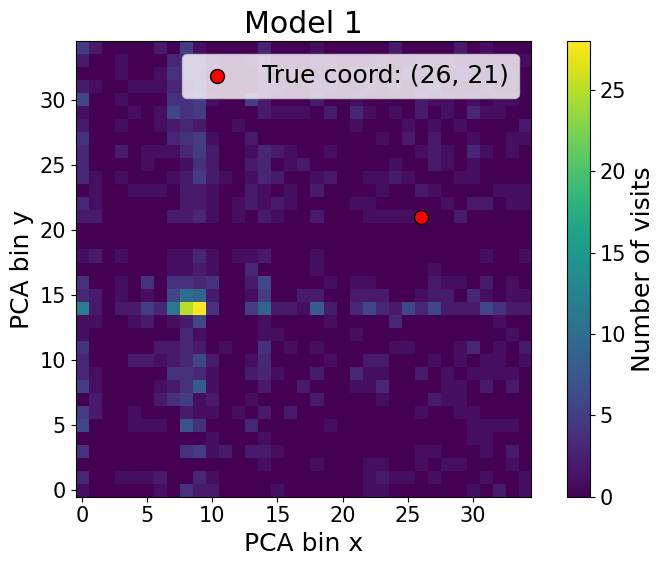

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters
Nbins = 35
cwd = os.getcwd() + "/"
# Load or extract the grid indices
coords_flat = np.load(cwd+f"{save_dir}_PCA_coord/{save_name}_PCA_coord.npy")  # shape: (N_iter,2)
print("coords_flat shape:", coords_flat.shape)
# Unflatten
x_coords = coords_flat[:, 0]  # x-coordinates
y_coords = coords_flat[:, 1]  # y-coordinates

# 2D colormap grid
heatmap = np.zeros((Nbins, Nbins), dtype=int)
# Populate the heatmap with visit counts
for x, y in zip(x_coords, y_coords):
    if 0 <= x < Nbins and 0 <= y < Nbins:  # Ensure coordinates are within bounds
        heatmap[y, x] += 1  # Increment visit count for the bin

# plotting
# --- Target coordinates (from init_sequence_num)
init_sequence_num = seq_data_test_filtered_with_PCA[12919]
target = init_sequence_num[-2:]  # last two values are PCA coordinates
target_x, target_y = init_sequence_num[-2:]
print("target coordinates:", target_x, target_y)

# --- Plotting
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, origin='lower', cmap='viridis')
plt.colorbar(label='Number of visits')
plt.scatter(target_x, target_y, c='red', s=100, edgecolors='black', label=f'True coord: ({target_x}, {target_y})')
plt.title("Model 1")
plt.xlabel("PCA bin x")
plt.ylabel("PCA bin y")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


## MODEL 2

In [25]:
H = 64
d= 10
N = 174
n_epochs = 500
nb_PCA_comp=2
loss_type = 'without_J'
family = 'jdoms' #'jdoms_bacteria_train2'
cwd = parent_dir
Q_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_youss/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
K_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_youss/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_youss/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
H,d,N=Q_1.shape
q=V_1.shape[1]

In [26]:
model=AttentionModel(H,d,N,q,Q=Q_1,V=V_1,K=K_1)
torch.sum(model.Q-Q_1)
device = Q_1.device
L = Q_1.shape[-1]
W=attention_heads_from_model(model,Q_1,K_1,V_1)
print(W.shape)

i_indices = torch.arange(L, device=device).unsqueeze(1)
j_indices = torch.arange(L, device=device).unsqueeze(0)
mask = (i_indices != j_indices).float().unsqueeze(0)  # shape (1, L, L)
W = W * mask
    
# Compute Jtens
Jtens = torch.einsum('hri,hab->abri', W, V_1)  # Shape: (q, q, L, L)
q = Jtens.shape[0]
N = Jtens.shape[2]
print(q)
print(N)
print(Jtens.shape)
print(Jtens.shape[-1])

torch.Size([64, 63, 63])
21
63
torch.Size([21, 21, 63, 63])
63


In [27]:
Q_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_2models_35_bins/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
K_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_2models_35_bins/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_2models_35_bins/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
H,d,N1=Q_1.shape
_,_,N2=K_1.shape
_,q1,q2=V_1.shape
model=AttentionModel_PCA(H,d,N1,N2,q1,q2,Q=Q_1,V=V_1,K=K_1)
torch.sum(model.Q-Q_1)
device = Q_1.device
L = Q_1.shape[-1]
W=attention_heads_from_model(model,Q_1,K_1,V_1)
print(W.shape)

# i_indices = torch.arange(L, device=device).unsqueeze(1)
# j_indices = torch.arange(L, device=device).unsqueeze(0)
# mask = (i_indices != j_indices).float().unsqueeze(0)  # shape (1, L, L)
# W = W * mask
    
# Compute Jtens
Jtens_PCA = torch.einsum('hri,hab->abri', W, V_1)  # Shape: (q, q, L, L)
q = Jtens.shape[0]
N = Jtens.shape[2]
print(q)
print(N)
print(Jtens_PCA.shape)

torch.Size([64, 63, 2])
21
63
torch.Size([21, 35, 63, 2])


## Generate PCA coords

In [28]:
import platform

if platform.system() == "Darwin":  # macOS
    base_path = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/CODE/DataAttentionDCA/jdoms'
else:  # assume Windows for Youss
    base_path = r"C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\DataAttentionDCA\jdoms"

file_test_data = f"{base_path}/jdoms_bacteria_train2.fasta"
seq_data_test=read_fasta_alignment(file_test_data,0.8)

print(seq_data_test.shape)
seq_data_test_filtered,_=remove_duplicate_sequences(seq_data_test)
seq_data_test_filtered=seq_data_test_filtered.T
seq_data_test_filtered_with_PCA= add_PCA_coords(seq_data_test_filtered,35) #####DONT FORGET TO CHANGE NUMBER OF BINS IF NECESSARY


#init_sequence = 'DYYQVLGVPKDADAKSIKKAFRKLARKYHPDVNPGDKEAERKFKEANEANEVLSDPEKRKKYD'
init_sequence_num = seq_data_test_filtered_with_PCA[12919]
print(init_sequence_num[-2:])
print("initial sequence number:", init_sequence_num)
ratio = 0.
init_sequence_num = modify_seq(init_sequence_num, ratio,nb_PCA_comp=2)
N_iter=100

save_dir = "generated_coords_Model2_PCA"
save_name = f"gen_coords_Ns{N_iter}_r{ratio}"
#target_coords = np.array([20, 20])  # Example target coordinates for PCA components
generate_coords_n_save(save_dir=save_dir, save_name=save_name, J=Jtens, N_iter = N_iter, init_sequence=init_sequence_num,nb_PCA_comp=nb_PCA_comp, J_PCA=Jtens_PCA, beta_PCA=1, model=2)
print("done generating coords with PLM from a fixed sequence sequence")

Total sequences read: 14502
Sequences after filtering: 14502
(63, 14502)
Removing duplicate sequences...
Done: 14502 -> 14502 sequences after removing duplicates.
[26 21]
initial sequence number: [20 20  4  3  9  4  5 17  3 14 14 13  2 14  0 13  9  2  0 14 18  8  3  9
 13 14 13  0  6 12  2 14  4  0 15  3  5  0  0  0 13 18 15 17 14  7 11  3
  0 19 13 14  9  8  3 12  9 16 14  0  0 19 20 26 21]


  0%|          | 0/100 [00:00<?, ?it/s]

Iteration 1/100


  1%|          | 1/100 [00:02<03:49,  2.32s/it]

Generated PCA coordinate: [ 3 28]
Iteration 2/100


  2%|▏         | 2/100 [00:04<04:05,  2.50s/it]

Generated PCA coordinate: [ 3 28]
Iteration 3/100


  3%|▎         | 3/100 [00:07<03:54,  2.42s/it]

Generated PCA coordinate: [ 3 24]
Iteration 4/100


  4%|▍         | 4/100 [00:09<03:45,  2.35s/it]

Generated PCA coordinate: [ 3 28]
Iteration 5/100


  5%|▌         | 5/100 [00:12<03:55,  2.48s/it]

Generated PCA coordinate: [ 3 28]
Iteration 6/100


  6%|▌         | 6/100 [00:14<03:42,  2.37s/it]

Generated PCA coordinate: [ 3 28]
Iteration 7/100


  7%|▋         | 7/100 [00:16<03:33,  2.30s/it]

Generated PCA coordinate: [ 3 28]
Iteration 8/100


  8%|▊         | 8/100 [00:19<03:51,  2.52s/it]

Generated PCA coordinate: [ 3 28]
Iteration 9/100


  9%|▉         | 9/100 [00:21<03:47,  2.50s/it]

Generated PCA coordinate: [ 3 28]
Iteration 10/100


 10%|█         | 10/100 [00:24<03:48,  2.54s/it]

Generated PCA coordinate: [ 3 28]
Iteration 11/100


 11%|█         | 11/100 [00:26<03:34,  2.41s/it]

Generated PCA coordinate: [ 3 28]
Iteration 12/100


 12%|█▏        | 12/100 [00:28<03:22,  2.30s/it]

Generated PCA coordinate: [ 3 28]
Iteration 13/100


 13%|█▎        | 13/100 [00:31<03:28,  2.39s/it]

Generated PCA coordinate: [ 3 28]
Iteration 14/100


 14%|█▍        | 14/100 [00:33<03:27,  2.41s/it]

Generated PCA coordinate: [ 3 28]
Iteration 15/100


 15%|█▌        | 15/100 [00:35<03:14,  2.29s/it]

Generated PCA coordinate: [ 3 28]
Iteration 16/100


 16%|█▌        | 16/100 [00:37<03:04,  2.20s/it]

Generated PCA coordinate: [ 3 28]
Iteration 17/100


 17%|█▋        | 17/100 [00:39<03:01,  2.18s/it]

Generated PCA coordinate: [ 3 28]
Iteration 18/100


 18%|█▊        | 18/100 [00:42<02:55,  2.14s/it]

Generated PCA coordinate: [34 28]
Iteration 19/100


 19%|█▉        | 19/100 [00:44<02:54,  2.16s/it]

Generated PCA coordinate: [ 3 28]
Iteration 20/100


 20%|██        | 20/100 [00:46<02:50,  2.13s/it]

Generated PCA coordinate: [ 3 28]
Iteration 21/100


 21%|██        | 21/100 [00:48<02:51,  2.18s/it]

Generated PCA coordinate: [ 3 28]
Iteration 22/100


 22%|██▏       | 22/100 [00:50<02:46,  2.13s/it]

Generated PCA coordinate: [ 3 28]
Iteration 23/100


 23%|██▎       | 23/100 [00:52<02:47,  2.17s/it]

Generated PCA coordinate: [ 3 28]
Iteration 24/100


 24%|██▍       | 24/100 [00:54<02:42,  2.14s/it]

Generated PCA coordinate: [34 28]
Iteration 25/100


 25%|██▌       | 25/100 [00:57<02:41,  2.16s/it]

Generated PCA coordinate: [ 3 28]
Iteration 26/100


 26%|██▌       | 26/100 [00:59<02:49,  2.28s/it]

Generated PCA coordinate: [ 3 28]
Iteration 27/100


 27%|██▋       | 27/100 [01:02<02:57,  2.44s/it]

Generated PCA coordinate: [ 3 28]
Iteration 28/100


 28%|██▊       | 28/100 [01:04<02:56,  2.45s/it]

Generated PCA coordinate: [ 3 28]
Iteration 29/100


 29%|██▉       | 29/100 [01:07<02:47,  2.35s/it]

Generated PCA coordinate: [34 28]
Iteration 30/100


 30%|███       | 30/100 [01:09<02:41,  2.31s/it]

Generated PCA coordinate: [ 3 28]
Iteration 31/100


 31%|███       | 31/100 [01:11<02:35,  2.25s/it]

Generated PCA coordinate: [ 3 28]
Iteration 32/100


 32%|███▏      | 32/100 [01:13<02:30,  2.21s/it]

Generated PCA coordinate: [ 3 28]
Iteration 33/100


 33%|███▎      | 33/100 [01:15<02:27,  2.21s/it]

Generated PCA coordinate: [ 3 28]
Iteration 34/100


 34%|███▍      | 34/100 [01:17<02:26,  2.21s/it]

Generated PCA coordinate: [ 3 28]
Iteration 35/100


 35%|███▌      | 35/100 [01:20<02:26,  2.25s/it]

Generated PCA coordinate: [ 3 28]
Iteration 36/100


 36%|███▌      | 36/100 [01:22<02:24,  2.25s/it]

Generated PCA coordinate: [ 3 28]
Iteration 37/100


 37%|███▋      | 37/100 [01:24<02:19,  2.22s/it]

Generated PCA coordinate: [ 3 28]
Iteration 38/100


 38%|███▊      | 38/100 [01:27<02:26,  2.36s/it]

Generated PCA coordinate: [ 3 28]
Iteration 39/100


 39%|███▉      | 39/100 [01:29<02:21,  2.31s/it]

Generated PCA coordinate: [ 3 28]
Iteration 40/100


 40%|████      | 40/100 [01:31<02:14,  2.25s/it]

Generated PCA coordinate: [ 3 28]
Iteration 41/100


 41%|████      | 41/100 [01:33<02:09,  2.19s/it]

Generated PCA coordinate: [ 3 28]
Iteration 42/100


 42%|████▏     | 42/100 [01:35<02:07,  2.19s/it]

Generated PCA coordinate: [ 3 28]
Iteration 43/100


 43%|████▎     | 43/100 [01:38<02:05,  2.20s/it]

Generated PCA coordinate: [ 3 24]
Iteration 44/100


 44%|████▍     | 44/100 [01:40<02:05,  2.24s/it]

Generated PCA coordinate: [ 3 28]
Iteration 45/100


 45%|████▌     | 45/100 [01:42<02:04,  2.26s/it]

Generated PCA coordinate: [ 3 28]
Iteration 46/100


 46%|████▌     | 46/100 [01:44<01:58,  2.19s/it]

Generated PCA coordinate: [ 3 28]
Iteration 47/100


 47%|████▋     | 47/100 [01:46<01:55,  2.17s/it]

Generated PCA coordinate: [ 3 28]
Iteration 48/100


 48%|████▊     | 48/100 [01:49<01:53,  2.18s/it]

Generated PCA coordinate: [ 3 28]
Iteration 49/100


 49%|████▉     | 49/100 [01:51<01:48,  2.13s/it]

Generated PCA coordinate: [ 3 28]
Iteration 50/100


 50%|█████     | 50/100 [01:53<01:47,  2.15s/it]

Generated PCA coordinate: [ 3 28]
Iteration 51/100


 51%|█████     | 51/100 [01:55<01:47,  2.19s/it]

Generated PCA coordinate: [ 3 28]
Iteration 52/100


 52%|█████▏    | 52/100 [01:58<01:47,  2.24s/it]

Generated PCA coordinate: [ 3 28]
Iteration 53/100


 53%|█████▎    | 53/100 [02:00<01:43,  2.20s/it]

Generated PCA coordinate: [ 3 28]
Iteration 54/100


 54%|█████▍    | 54/100 [02:02<01:40,  2.19s/it]

Generated PCA coordinate: [ 3 28]
Iteration 55/100


 55%|█████▌    | 55/100 [02:04<01:39,  2.21s/it]

Generated PCA coordinate: [ 3 28]
Iteration 56/100


 56%|█████▌    | 56/100 [02:06<01:36,  2.20s/it]

Generated PCA coordinate: [34 28]
Iteration 57/100


 57%|█████▋    | 57/100 [02:08<01:34,  2.19s/it]

Generated PCA coordinate: [ 3 24]
Iteration 58/100


 58%|█████▊    | 58/100 [02:11<01:37,  2.32s/it]

Generated PCA coordinate: [ 3 28]
Iteration 59/100


 59%|█████▉    | 59/100 [02:13<01:34,  2.30s/it]

Generated PCA coordinate: [ 3 28]
Iteration 60/100


 60%|██████    | 60/100 [02:15<01:30,  2.25s/it]

Generated PCA coordinate: [ 3 28]
Iteration 61/100


 61%|██████    | 61/100 [02:17<01:25,  2.20s/it]

Generated PCA coordinate: [ 3 28]
Iteration 62/100


 62%|██████▏   | 62/100 [02:20<01:23,  2.20s/it]

Generated PCA coordinate: [ 3 28]
Iteration 63/100


 63%|██████▎   | 63/100 [02:22<01:20,  2.18s/it]

Generated PCA coordinate: [ 3 28]
Iteration 64/100


 64%|██████▍   | 64/100 [02:24<01:16,  2.13s/it]

Generated PCA coordinate: [ 3 28]
Iteration 65/100


 65%|██████▌   | 65/100 [02:26<01:14,  2.14s/it]

Generated PCA coordinate: [ 3 28]
Iteration 66/100


 66%|██████▌   | 66/100 [02:28<01:11,  2.11s/it]

Generated PCA coordinate: [ 3 28]
Iteration 67/100


 67%|██████▋   | 67/100 [02:30<01:12,  2.19s/it]

Generated PCA coordinate: [ 3 28]
Iteration 68/100


 68%|██████▊   | 68/100 [02:32<01:08,  2.14s/it]

Generated PCA coordinate: [ 3 28]
Iteration 69/100


 69%|██████▉   | 69/100 [02:35<01:05,  2.12s/it]

Generated PCA coordinate: [ 3 28]
Iteration 70/100


 70%|███████   | 70/100 [02:37<01:05,  2.19s/it]

Generated PCA coordinate: [ 3 28]
Iteration 71/100


 71%|███████   | 71/100 [02:39<01:04,  2.22s/it]

Generated PCA coordinate: [ 3 28]
Iteration 72/100


 72%|███████▏  | 72/100 [02:41<01:02,  2.22s/it]

Generated PCA coordinate: [ 3 28]
Iteration 73/100


 73%|███████▎  | 73/100 [02:44<00:59,  2.20s/it]

Generated PCA coordinate: [ 3 28]
Iteration 74/100


 74%|███████▍  | 74/100 [02:46<00:56,  2.17s/it]

Generated PCA coordinate: [ 3 28]
Iteration 75/100


 75%|███████▌  | 75/100 [02:48<00:54,  2.18s/it]

Generated PCA coordinate: [ 3 28]
Iteration 76/100


 76%|███████▌  | 76/100 [02:50<00:52,  2.19s/it]

Generated PCA coordinate: [ 3 28]
Iteration 77/100


 77%|███████▋  | 77/100 [02:52<00:51,  2.24s/it]

Generated PCA coordinate: [ 3 28]
Iteration 78/100


 78%|███████▊  | 78/100 [02:55<00:49,  2.25s/it]

Generated PCA coordinate: [ 3 28]
Iteration 79/100


 79%|███████▉  | 79/100 [02:57<00:46,  2.20s/it]

Generated PCA coordinate: [ 3 28]
Iteration 80/100


 80%|████████  | 80/100 [02:59<00:43,  2.18s/it]

Generated PCA coordinate: [ 3 28]
Iteration 81/100


 81%|████████  | 81/100 [03:01<00:41,  2.18s/it]

Generated PCA coordinate: [ 3 28]
Iteration 82/100


 82%|████████▏ | 82/100 [03:03<00:38,  2.14s/it]

Generated PCA coordinate: [ 3 28]
Iteration 83/100


 83%|████████▎ | 83/100 [03:05<00:36,  2.12s/it]

Generated PCA coordinate: [ 3 28]
Iteration 84/100


 84%|████████▍ | 84/100 [03:07<00:34,  2.16s/it]

Generated PCA coordinate: [ 3 28]
Iteration 85/100


 85%|████████▌ | 85/100 [03:10<00:32,  2.14s/it]

Generated PCA coordinate: [ 3 28]
Iteration 86/100


 86%|████████▌ | 86/100 [03:12<00:30,  2.15s/it]

Generated PCA coordinate: [ 3 28]
Iteration 87/100


 87%|████████▋ | 87/100 [03:14<00:29,  2.24s/it]

Generated PCA coordinate: [ 3 28]
Iteration 88/100


 88%|████████▊ | 88/100 [03:16<00:26,  2.20s/it]

Generated PCA coordinate: [ 3 28]
Iteration 89/100


 89%|████████▉ | 89/100 [03:18<00:23,  2.15s/it]

Generated PCA coordinate: [ 3 28]
Iteration 90/100


 90%|█████████ | 90/100 [03:20<00:21,  2.11s/it]

Generated PCA coordinate: [ 3 28]
Iteration 91/100


 91%|█████████ | 91/100 [03:23<00:19,  2.14s/it]

Generated PCA coordinate: [ 3 28]
Iteration 92/100


 92%|█████████▏| 92/100 [03:25<00:17,  2.13s/it]

Generated PCA coordinate: [ 3 28]
Iteration 93/100


 93%|█████████▎| 93/100 [03:27<00:14,  2.10s/it]

Generated PCA coordinate: [ 3 28]
Iteration 94/100


 94%|█████████▍| 94/100 [03:29<00:12,  2.08s/it]

Generated PCA coordinate: [ 3 28]
Iteration 95/100


 95%|█████████▌| 95/100 [03:31<00:10,  2.05s/it]

Generated PCA coordinate: [ 3 28]
Iteration 96/100


 96%|█████████▌| 96/100 [03:33<00:08,  2.04s/it]

Generated PCA coordinate: [ 3 28]
Iteration 97/100


 97%|█████████▋| 97/100 [03:35<00:06,  2.04s/it]

Generated PCA coordinate: [ 3 28]
Iteration 98/100


 98%|█████████▊| 98/100 [03:37<00:04,  2.09s/it]

Generated PCA coordinate: [ 3 28]
Iteration 99/100


 99%|█████████▉| 99/100 [03:39<00:02,  2.12s/it]

Generated PCA coordinate: [ 3 28]
Iteration 100/100


100%|██████████| 100/100 [03:41<00:00,  2.22s/it]

Generated PCA coordinate: [ 3 28]
(100, 2)
Generated PCA coordinates (first 5): [[ 3 28]
 [ 3 28]
 [ 3 24]
 [ 3 28]
 [ 3 28]]
PCA coordinates saved to generated_coords_Model2_PCA_PCA_coord
done generating coords with PLM from a fixed sequence sequence


coords_flat shape: (100, 2)
target coordinates: 26 21


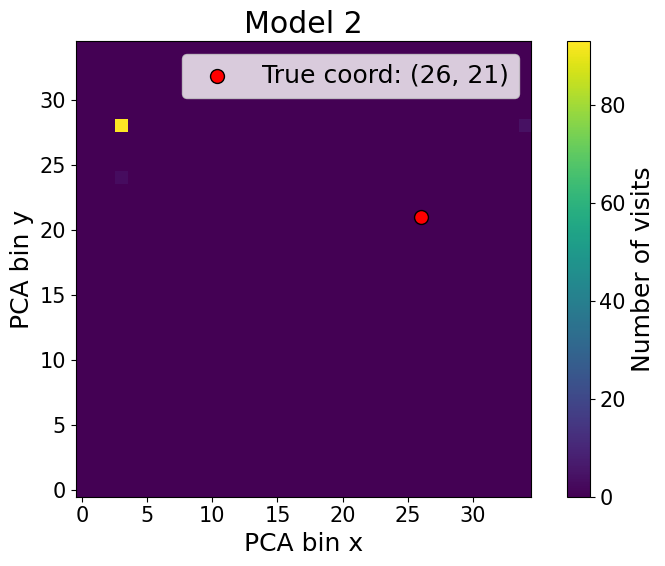

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters
Nbins = 35
cwd = os.getcwd() + "/"
# Load or extract the grid indices
coords_flat = np.load(cwd+f"{save_dir}_PCA_coord/{save_name}_PCA_coord.npy")  # shape: (N_iter,2)
print("coords_flat shape:", coords_flat.shape)
# Unflatten
x_coords = coords_flat[:, 0]  # x-coordinates
y_coords = coords_flat[:, 1]  # y-coordinates

# 2D colormap grid
heatmap = np.zeros((Nbins, Nbins), dtype=int)
# Populate the heatmap with visit counts
for x, y in zip(x_coords, y_coords):
    if 0 <= x < Nbins and 0 <= y < Nbins:  # Ensure coordinates are within bounds
        heatmap[y, x] += 1  # Increment visit count for the bin

# plotting
# --- Target coordinates (from init_sequence_num)
init_sequence_num = seq_data_test_filtered_with_PCA[12919]
target = init_sequence_num[-2:]  # last two values are PCA coordinates
target_x, target_y = init_sequence_num[-2:]
print("target coordinates:", target_x, target_y)

# --- Plotting
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, origin='lower', cmap='viridis')
plt.colorbar(label='Number of visits')
plt.scatter(target_x, target_y, c='red', s=100, edgecolors='black', label=f'True coord: ({target_x}, {target_y})')
plt.title("Model 2")
plt.xlabel("PCA bin x")
plt.ylabel("PCA bin y")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## Model 3

In [31]:
H = 64
d= 10
N = 174
n_epochs = 500
nb_PCA_comp=2
loss_type = 'without_J'
family = 'jdoms' #'jdoms_bacteria_train2'
cwd = parent_dir
Q_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_youss/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
K_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_youss/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_youss/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
H,d,N=Q_1.shape
q=V_1.shape[1]

# --------------------- PCA 2 models ---------------------
model=AttentionModel(H,d,N,q,Q=Q_1,V=V_1,K=K_1)
torch.sum(model.Q-Q_1)
device = Q_1.device
L = Q_1.shape[-1]
W=attention_heads_from_model(model,Q_1,K_1,V_1)
print(W.shape)

i_indices = torch.arange(L, device=device).unsqueeze(1)
j_indices = torch.arange(L, device=device).unsqueeze(0)
mask = (i_indices != j_indices).float().unsqueeze(0)  # shape (1, L, L)
W = W * mask
    
# Compute Jtens
Jtens = torch.einsum('hri,hab->abri', W, V_1)  # Shape: (q, q, L, L)
q = Jtens.shape[0]
N = Jtens.shape[2]
print(q)
print(N)
print(Jtens.shape)
print(Jtens.shape[-1])

# --------------------- PCA 2 models ---------------------
Q_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_2models_flat_35_bins/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
K_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_2models_flat_35_bins/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
V_1 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}_PCA_2models_flat_35_bins/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
H,d,N1=Q_1.shape
_,_,N2=K_1.shape
_,q1,q2=V_1.shape
model=AttentionModel_PCA(H,d,N1,N2,q1,q2,Q=Q_1,V=V_1,K=K_1)
torch.sum(model.Q-Q_1)
device = Q_1.device
L = Q_1.shape[-1]
W=attention_heads_from_model(model,Q_1,K_1,V_1)
print(W.shape)

# i_indices = torch.arange(L, device=device).unsqueeze(1)
# j_indices = torch.arange(L, device=device).unsqueeze(0)
# mask = (i_indices != j_indices).float().unsqueeze(0)  # shape (1, L, L)
# W = W * mask
    
# Compute Jtens
Jtens_PCA = torch.einsum('hri,hab->abri', W, V_1)  # Shape: (q, q, L, L)
q = Jtens.shape[0]
N = Jtens.shape[2]
print(q)
print(N)
print(Jtens_PCA.shape)

torch.Size([64, 63, 63])
21
63
torch.Size([21, 21, 63, 63])
63
torch.Size([64, 63, 1])
21
63
torch.Size([21, 1225, 63, 1])


In [33]:
import platform

if platform.system() == "Darwin":  # macOS
    base_path = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/CODE/DataAttentionDCA/jdoms'
else:  # assume Windows for Youss
    base_path = r"C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\DataAttentionDCA\jdoms"

file_test_data = f"{base_path}/jdoms_bacteria_train2.fasta"
seq_data_test=read_fasta_alignment(file_test_data,0.8)

print(seq_data_test.shape)
seq_data_test_filtered,_=remove_duplicate_sequences(seq_data_test)
seq_data_test_filtered=seq_data_test_filtered.T
seq_data_test_filtered_with_PCA= add_PCA_coords(seq_data_test_filtered,35) #####DONT FORGET TO CHANGE NUMBER OF BINS IF NECESSARY


#init_sequence = 'DYYQVLGVPKDADAKSIKKAFRKLARKYHPDVNPGDKEAERKFKEANEANEVLSDPEKRKKYD'
init_sequence_num = seq_data_test_filtered_with_PCA[12919]
print(init_sequence_num[-2:])
print("initial sequence number:", init_sequence_num)
ratio = 0.
init_sequence_num = modify_seq(init_sequence_num, ratio,nb_PCA_comp=2)
N_iter=100

save_dir = "generated_coords_Model3_PCA"
save_name = f"gen_coords_Ns{N_iter}_r{ratio}"
#target_coords = np.array([20, 20])  # Example target coordinates for PCA components
generate_coords_n_save(save_dir=save_dir, save_name=save_name, J=Jtens, N_iter = N_iter, init_sequence=init_sequence_num,nb_PCA_comp=nb_PCA_comp, J_PCA=Jtens_PCA, beta_PCA=1, model=3)
print("done generating coords with PLM from a fixed sequence sequence")

Total sequences read: 14502
Sequences after filtering: 14502
(63, 14502)
Removing duplicate sequences...
Done: 14502 -> 14502 sequences after removing duplicates.
[26 21]
initial sequence number: [20 20  4  3  9  4  5 17  3 14 14 13  2 14  0 13  9  2  0 14 18  8  3  9
 13 14 13  0  6 12  2 14  4  0 15  3  5  0  0  0 13 18 15 17 14  7 11  3
  0 19 13 14  9  8  3 12  9 16 14  0  0 19 20 26 21]
Mismatch of PCA tensor and nb PCA components indicated


  3%|▎         | 3/100 [00:00<00:03, 24.63it/s]

Iteration 1/100
Generated PCA coordinate: [ 8 21]
Iteration 2/100
Generated PCA coordinate: [10 26]
Iteration 3/100
Generated PCA coordinate: [ 9 27]
Iteration 4/100
Generated PCA coordinate: [25 13]
Iteration 5/100


  9%|▉         | 9/100 [00:00<00:03, 24.98it/s]

Generated PCA coordinate: [25 17]
Iteration 6/100
Generated PCA coordinate: [18 24]
Iteration 7/100
Generated PCA coordinate: [15  0]
Iteration 8/100
Generated PCA coordinate: [29 29]
Iteration 9/100
Generated PCA coordinate: [24 21]
Iteration 10/100
Generated PCA coordinate: [31 17]
Iteration 11/100


 15%|█▌        | 15/100 [00:00<00:03, 25.12it/s]

Generated PCA coordinate: [ 9 29]
Iteration 12/100
Generated PCA coordinate: [8 0]
Iteration 13/100
Generated PCA coordinate: [ 7 29]
Iteration 14/100
Generated PCA coordinate: [23 11]
Iteration 15/100
Generated PCA coordinate: [18  6]
Iteration 16/100


 18%|█▊        | 18/100 [00:00<00:03, 25.00it/s]

Generated PCA coordinate: [22  9]
Iteration 17/100
Generated PCA coordinate: [ 2 28]
Iteration 18/100
Generated PCA coordinate: [19 23]
Iteration 19/100
Generated PCA coordinate: [13 12]
Iteration 20/100
Generated PCA coordinate: [30 25]
Iteration 21/100


 24%|██▍       | 24/100 [00:00<00:03, 23.89it/s]

Generated PCA coordinate: [10 13]
Iteration 22/100
Generated PCA coordinate: [33  8]
Iteration 23/100
Generated PCA coordinate: [25  4]
Iteration 24/100
Generated PCA coordinate: [26  0]
Iteration 25/100
Generated PCA coordinate: [24  8]
Iteration 26/100
Generated PCA coordinate: [ 7 25]
Iteration 27/100


 27%|██▋       | 27/100 [00:01<00:02, 25.39it/s]

Generated PCA coordinate: [10 14]
Iteration 28/100
Generated PCA coordinate: [32  0]
Iteration 29/100


 33%|███▎      | 33/100 [00:01<00:03, 19.33it/s]

Generated PCA coordinate: [29 22]
Iteration 30/100
Generated PCA coordinate: [33  3]
Iteration 31/100
Generated PCA coordinate: [12  0]
Iteration 32/100
Generated PCA coordinate: [13 13]
Iteration 33/100
Generated PCA coordinate: [34  3]
Iteration 34/100


 39%|███▉      | 39/100 [00:01<00:02, 22.76it/s]

Generated PCA coordinate: [29 29]
Iteration 35/100
Generated PCA coordinate: [29  6]
Iteration 36/100
Generated PCA coordinate: [ 9 17]
Iteration 37/100
Generated PCA coordinate: [21 30]
Iteration 38/100
Generated PCA coordinate: [18 18]
Iteration 39/100
Generated PCA coordinate: [21 32]
Iteration 40/100


 45%|████▌     | 45/100 [00:01<00:02, 25.56it/s]

Generated PCA coordinate: [32 21]
Iteration 41/100
Generated PCA coordinate: [ 8 25]
Iteration 42/100
Generated PCA coordinate: [10 18]
Iteration 43/100
Generated PCA coordinate: [33  5]
Iteration 44/100
Generated PCA coordinate: [18 27]
Iteration 45/100
Generated PCA coordinate: [24 18]
Iteration 46/100


 51%|█████     | 51/100 [00:02<00:01, 27.38it/s]

Generated PCA coordinate: [23  7]
Iteration 47/100
Generated PCA coordinate: [1 3]
Iteration 48/100
Generated PCA coordinate: [ 1 19]
Iteration 49/100
Generated PCA coordinate: [ 4 11]
Iteration 50/100
Generated PCA coordinate: [12  8]
Iteration 51/100
Generated PCA coordinate: [31 26]
Iteration 52/100


 57%|█████▋    | 57/100 [00:02<00:01, 28.46it/s]

Generated PCA coordinate: [20  0]
Iteration 53/100
Generated PCA coordinate: [ 7 32]
Iteration 54/100
Generated PCA coordinate: [28 23]
Iteration 55/100
Generated PCA coordinate: [ 4 31]
Iteration 56/100
Generated PCA coordinate: [14 16]
Iteration 57/100
Generated PCA coordinate: [21 24]
Iteration 58/100


 63%|██████▎   | 63/100 [00:02<00:01, 28.76it/s]

Generated PCA coordinate: [14 10]
Iteration 59/100
Generated PCA coordinate: [30  5]
Iteration 60/100
Generated PCA coordinate: [20 32]
Iteration 61/100
Generated PCA coordinate: [24 33]
Iteration 62/100
Generated PCA coordinate: [19  2]
Iteration 63/100
Generated PCA coordinate: [2 6]
Iteration 64/100


 69%|██████▉   | 69/100 [00:02<00:01, 27.93it/s]

Generated PCA coordinate: [20  7]
Iteration 65/100
Generated PCA coordinate: [10 24]
Iteration 66/100
Generated PCA coordinate: [4 3]
Iteration 67/100
Generated PCA coordinate: [31 24]
Iteration 68/100
Generated PCA coordinate: [32 32]
Iteration 69/100
Generated PCA coordinate: [25 30]
Iteration 70/100


 75%|███████▌  | 75/100 [00:02<00:00, 27.53it/s]

Generated PCA coordinate: [16 21]
Iteration 71/100
Generated PCA coordinate: [19 18]
Iteration 72/100
Generated PCA coordinate: [31 19]
Iteration 73/100
Generated PCA coordinate: [13 17]
Iteration 74/100
Generated PCA coordinate: [29 15]
Iteration 75/100
Generated PCA coordinate: [23 14]
Iteration 76/100


 81%|████████  | 81/100 [00:03<00:00, 28.00it/s]

Generated PCA coordinate: [ 4 20]
Iteration 77/100
Generated PCA coordinate: [22 32]
Iteration 78/100
Generated PCA coordinate: [22 13]
Iteration 79/100
Generated PCA coordinate: [9 9]
Iteration 80/100
Generated PCA coordinate: [24 32]
Iteration 81/100
Generated PCA coordinate: [ 4 28]
Iteration 82/100


 87%|████████▋ | 87/100 [00:03<00:00, 28.60it/s]

Generated PCA coordinate: [3 3]
Iteration 83/100
Generated PCA coordinate: [15  6]
Iteration 84/100
Generated PCA coordinate: [28  4]
Iteration 85/100
Generated PCA coordinate: [21 29]
Iteration 86/100
Generated PCA coordinate: [20  7]
Iteration 87/100
Generated PCA coordinate: [16 29]
Iteration 88/100


 93%|█████████▎| 93/100 [00:03<00:00, 28.04it/s]

Generated PCA coordinate: [ 9 13]
Iteration 89/100
Generated PCA coordinate: [21 28]
Iteration 90/100
Generated PCA coordinate: [32 34]
Iteration 91/100
Generated PCA coordinate: [13 30]
Iteration 92/100
Generated PCA coordinate: [10  7]
Iteration 93/100
Generated PCA coordinate: [12  6]
Iteration 94/100


 96%|█████████▌| 96/100 [00:03<00:00, 26.03it/s]

Generated PCA coordinate: [7 6]
Iteration 95/100
Generated PCA coordinate: [ 6 19]
Iteration 96/100
Generated PCA coordinate: [ 0 10]
Iteration 97/100
Generated PCA coordinate: [25  9]
Iteration 98/100
Generated PCA coordinate: [ 1 21]
Iteration 99/100


100%|██████████| 100/100 [00:03<00:00, 25.50it/s]

Generated PCA coordinate: [ 5 20]
Iteration 100/100
Generated PCA coordinate: [13 13]
(100, 2)
Generated PCA coordinates (first 5): [[ 8 21]
 [10 26]
 [ 9 27]
 [25 13]
 [25 17]]
PCA coordinates saved to generated_coords_Model3_PCA_PCA_coord
done generating coords with PLM from a fixed sequence sequence


coords_flat shape: (100, 2)
target coordinates: 26 21


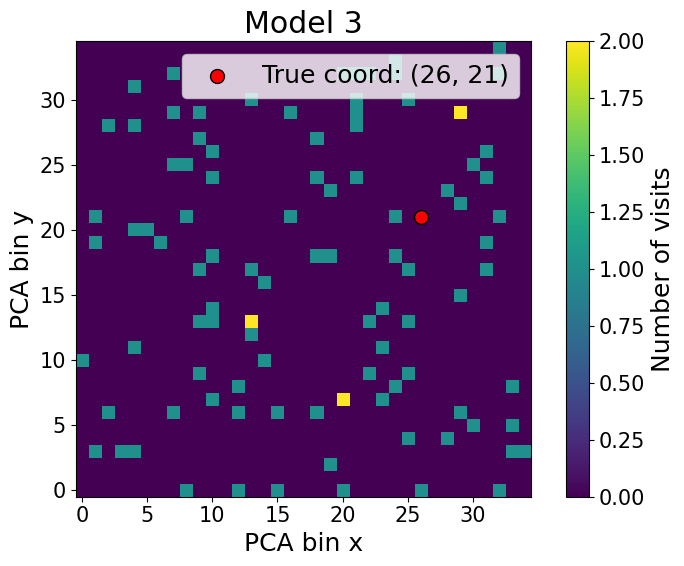

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters
Nbins = 35
cwd = os.getcwd() + "/"
# Load or extract the grid indices
coords_flat = np.load(cwd+f"{save_dir}_PCA_coord/{save_name}_PCA_coord.npy")  # shape: (N_iter,2)
print("coords_flat shape:", coords_flat.shape)
# Unflatten
x_coords = coords_flat[:, 0]  # x-coordinates
y_coords = coords_flat[:, 1]  # y-coordinates

# 2D colormap grid
heatmap = np.zeros((Nbins, Nbins), dtype=int)
# Populate the heatmap with visit counts
for x, y in zip(x_coords, y_coords):
    if 0 <= x < Nbins and 0 <= y < Nbins:  # Ensure coordinates are within bounds
        heatmap[y, x] += 1  # Increment visit count for the bin

# plotting
# --- Target coordinates (from init_sequence_num)
init_sequence_num = seq_data_test_filtered_with_PCA[12919]
target = init_sequence_num[-2:]  # last two values are PCA coordinates
target_x, target_y = init_sequence_num[-2:]
print("target coordinates:", target_x, target_y)

# --- Plotting
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, origin='lower', cmap='viridis')
plt.colorbar(label='Number of visits')
plt.scatter(target_x, target_y, c='red', s=100, edgecolors='black', label=f'True coord: ({target_x}, {target_y})')
plt.title("Model 3")
plt.xlabel("PCA bin x")
plt.ylabel("PCA bin y")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## Previous

In [ ]:
# print part of J_PCA
J_PCA = np.array(Jtens_PCA)
print("J_PCA stats:")
print("Min:", np.min(J_PCA))
print("Max:", np.max(J_PCA))
print("Mean:", np.mean(J_PCA))
print("Std dev:", np.std(J_PCA))


J_PCA stats:
Min: -7.144266
Max: 12.682256
Mean: 0.68127644
Std dev: 1.16878


/var/folders/dv/fpf7xq8j6yzfxjs7g9c_bbyc0000gn/T/ipykernel_65938/1304116453.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  J_PCA = np.array(Jtens_PCA)


[28 19]
initial sequence number: [20 20  4  8  7  4  2  9 12 17  2  7  2 13 16 16  9 15 15 14 19  9  0  9
 13  8 15  9  6 12  2 11 19 12 13  3 13  9  0  7 13  8 15  0  3 17 11  2
  0  9 13  7  9  8  2 12  7  9 14  0 20 20 20 28 19]
[28 19]
True PCA coords: [28 19]
Best coords     : (3, 26)
Min energy      : tensor(-101.5810)


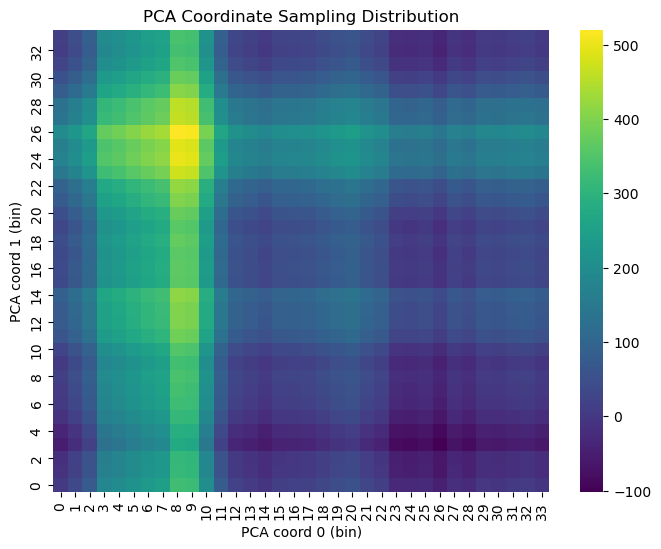

In [ ]:
def check_joint_coordinate_fit(sequence_PCA, J_PCA, beta_PCA=1, nb_PCA_comp=2):
    sequence = sequence_PCA[:-nb_PCA_comp]  # Exclude PCA coordinates
    L = sequence.shape[0]
    Nbins = J_PCA.shape[1]
    best_energy = float('inf')
    best_coords = (None, None)

    for i in range(Nbins):  # PCA 0
        for j in range(Nbins):  # PCA 1
            energy = 0.0
            for pos in range(L):
                aa = sequence[pos]
                energy += beta_PCA * (J_PCA[aa, i, pos, 0] + J_PCA[aa, j, pos, 1])
            if energy < best_energy:
                best_energy = energy
                best_coords = (i, j)
    PCA_coords_true = sequence_PCA[-nb_PCA_comp:]
    print("True PCA coords:", PCA_coords_true)
    print("Best coords     :", best_coords)
    print("Min energy      :", best_energy)

init_sequence_num = seq_data_test_filtered_with_PCA[10000]
print(init_sequence_num[-2:])
print("initial sequence number:", init_sequence_num)
ratio = 0.
init_sequence_num = modify_seq(init_sequence_num, ratio,nb_PCA_comp=2)
print(init_sequence_num[-nb_PCA_comp:])
check_joint_coordinate_fit(init_sequence_num, Jtens_PCA, beta_PCA=1, nb_PCA_comp=2)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_probabilities_2D(probs, title="Probabilities Heatmap"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(probs, cmap='viridis', cbar=True)
    plt.gca().invert_yaxis()  # Invert y-axis to match PCA coordinate orientation
    plt.title(title)
    plt.xlabel("PCA coord 0 (bin)")
    plt.ylabel("PCA coord 1 (bin)")
    plt.show()

def compute_pca_probs_2D(sequence, J_PCA, beta_PCA=1.0):
    Nbins = J_PCA.shape[1]
    L = sequence.shape[0]
    probs = np.zeros((Nbins, Nbins))  # [PCA_comp_0, PCA_comp_1]

    for i in range(Nbins):  # trial coord for PCA comp 0
        for j in range(Nbins):  # trial coord for PCA comp 1
            energy = 0.0
            for pos in range(L):
                aa = sequence[pos]
                energy += beta_PCA * (J_PCA[aa, i, pos, 0] + J_PCA[aa, j, pos, 1])
            probs[i, j] = (energy)  # Boltzmann probability
    #probs /= probs.sum()  # Normalize
    return probs

# Example usage
sequence = init_sequence_num[:L]  # Only AA part, no PCA coords
probs_2D = compute_pca_probs_2D(sequence, Jtens_PCA, beta_PCA=1.0)
plot_probabilities_2D(probs_2D, title="PCA Coordinate Sampling Distribution")